In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_colwidth", 0)
# from IPython.core.display import display, HTML
# display(HTML("<style>div.output_scroll { height: 100em; }</style>"))


In [67]:
raw_data = pd.read_csv("play_sessions.csv")

In [68]:
len(raw_data)

967

In [69]:
raw_data.columns

Index(['_id', 'assent', 'consent', 'domain', 'frames', 'game', 'object_name',
       'server_time', 'time_stamp', 'user_id', 'version'],
      dtype='object')

In [70]:
raw_data = raw_data[raw_data.user_id.notnull()]
raw_data = raw_data[raw_data.version >= "1.0.3"]
raw_data = raw_data.reset_index()
len(raw_data)

633

# Looking at one session

In [6]:
def parse_raw_data_frames(row:int) -> pd.DataFrame:
    frames = raw_data.frames[row]
    obj = json.loads(frames)
    for i, o in enumerate(obj):
        obj[i] = json.loads(obj[i])
    session = pd.DataFrame(obj)
    return session

session0 = parse_raw_data_frames(0)

In [7]:
session0[session0.actor == "programming_interface"].head(2)

actor     verb                             object_name  \
2  programming_interface  create   spike_movemenet_direction_for_duration   
3  programming_interface  endDrag  spike_movemenet_direction_for_duration   

  domain               time_stamp                               context  \
2  NaN    2022-07-20 21:54:39.123  {'block_id': ']:#;If^S,Pl7S87X0Dhp'}   
3  NaN    2022-07-20 21:54:39.123  {'block_id': ']:#;If^S,Pl7S87X0Dhp'}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             state_info  \
2  {'program': '{"targets":[{"isStage":true,"name":"Stage","variables":{"`jEk@4|i[#Fk?(8x)AV.-my variable":["my variable",0]},"lists":{},"broadcasts":{},"blocks":{"io9Jcf3?[Z3`[$L)5Zbd":{"opcode":"event_whenprogramstarts","next":null,"parent":null,"inputs":{},"fields":{},"shadow":false,"topLevel":true,"x":69,"y":53},"]:#;If^S,Pl7S87X0Dhp":{"opcode":"spike_movemenet_direction_for_duration","next":null,"parent":null,"inputs":{"DIRECTION":[1,"kW^rlmBz~6}C$XdGkH_z"],"RATE":[1,[4,"10"]]},"fields":{"UNITS":["cm",null]},"shadow":false,"topLevel":true,"x":-358,"y":55},"kW^rlmBz~6}C$XdGkH_z":{"opcode":"spike_movement_direction_picker","next":null,"parent":"]:#;If^S,Pl7S87X0Dhp","inputs":{},"fields":{"SPIN_DIRECTIONS":["forward",null]},"shadow":true,"topLevel":false}},"comments":{},"currentCostume":0,"costumes":[{"assetId":"cd21514d0531fdffb22204e0ec5ed84a","name":"backdrop1","md5ext":"cd21514d0531fdffb22204e0ec5ed84a.svg","dataFormat":"svg","rotationCenterX":240,"rotationCenterY":180}],"sounds":[{"assetId":"83a9787d4cb6f3b7632b4ddfebf74367","name":"pop","dataFormat":"wav","format":"","rate":48000,"sampleCount":1123,"md5ext":"83a9787d4cb6f3b7632b4ddfebf74367.wav"}],"volume":100,"tempo":60,"videoTransparency":50,"videoState":"on","textToSpeechLanguage":null}],"monitors":[],"extensions":[],"meta":{"semver":"3.0.0","vm":"0.11.4","agent":"Mozilla/5.0 (X11; CrOS x86_64 14816.99.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}}'}   
3  {'program': '{"targets":[{"isStage":true,"name":"Stage","variables":{"`jEk@4|i[#Fk?(8x)AV.-my variable":["my variable",0]},"lists":{},"broadcasts":{},"blocks":{"io9Jcf3?[Z3`[$L)5Zbd":{"opcode":"event_whenprogramstarts","next":null,"parent":null,"inputs":{},"fields":{},"shadow":false,"topLevel":true,"x":69,"y":53},"]:#;If^S,Pl7S87X0Dhp":{"opcode":"spike_movemenet_direction_for_duration","next":null,"parent":null,"inputs":{"DIRECTION":[1,"kW^rlmBz~6}C$XdGkH_z"],"RATE":[1,[4,"10"]]},"fields":{"UNITS":["cm",null]},"shadow":false,"topLevel":true,"x":-358,"y":55},"kW^rlmBz~6}C$XdGkH_z":{"opcode":"spike_movement_direction_p

In [8]:
session0[session0.actor == "episode_data"].head(2)

actor             verb                               object_name  \
8  episode_data  episode_started  spike_curric_turning_in_place_curriculum   
9  episode_data  api_called       spike_movemenet_direction_for_duration     

  domain               time_stamp  \
8  NaN    2022-07-20 21:54:39.123   
9  NaN    2022-07-20 21:54:39.123   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    context  \
8  {'robot': 'TACObot', 'episode_id': 0, 'starting_points': [], 'checkpoints': [{'name': 'command_checkpoint_turn_right_10_cm_uid?94396d60-d040-4e01-ba41-9d46b8efd91e', 'type': 'robot_trigger', 'position': {'x': 0.03885231, 'y': 0.5265381, 'z': 0.114272185}, 'rotation': {'x': 0, 'y': 0, 'z': 0}, 'bounds': {'center': {'x': 0.03885232, 'y': 0.526538134, 'z': 0.114272177}, 'extents': {'x': 0.5, 'y': 0.5, 'z': 0.5}, 'max': {'x': -0.461147666, 'y': 0.0265381336, 'z': -0.385727823}, 'min': {'x': -0.461147666, 'y': 0.0265381336, 'z': -0.385727823}, 'size': {'x': 1, 'y': 1, 'z': 1}}, 'is_complete': False, 'is_enabled': True}], 'obstacles': []}           
9  {'block': {'id': ']:#;If^S,Pl7S87X0Dhp', 'opcode': 'spike_movemenet_direction_for_duration', 'inputs': {'DIRECTION': {'name': 'DIRECTION', 'block': 'kW^rlmBz~6}C$XdGkH_z', 'shadow': 'kW^rlmBz~6}C$XdGkH_z'}, 'RATE': {'name': 'RATE', 'block': 'wxl0LDP)|FSX,l{+qRTk', 'shadow': 'wxl0LDP)|FSX,l{+qRTk'}}, 'fields': {'UNITS': {'name': 'UNITS', 'value': 'cm'}}, 'next': None, 'topLevel': False, 'parent': 'io9Jcf3?[Z3`[$L)5Zbd', 'shadow': False, 'x': '-358', 'y': '55'}, 'api': {'topic': 'drivetrain', 'message': {'method': 'driveDirectionForUnits', 'parameters': {'UNITS': 'cm', 'DIRECTION': 'right', 'RATE': '10', 'resolver': '7wH;{DO0GXP(ynU[}L(K'}}}}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [9]:
session0[session0.actor == "curriculum_interface"].head(2)

actor    verb object_name domain               time_stamp  \
1  curriculum_interface  loaded  0           NaN    2022-07-20 21:54:39.123   
5  curriculum_interface  next    1           NaN    2022-07-20 21:54:39.123   

  context  \
1  None     
5  None     

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  state_info  \
1  {'program': '{"targets":[{"isStage":true,"name":"Stage","variables":{"`jEk@4|i[#Fk?(8x)AV.-my variable":["my variable",0]},"lists":{},"broadcasts":{},"blocks":{"io9Jcf3?[Z3`[$L)5Zbd":{"opcode":"event_whenprogramstarts","next":null,"parent":null,"inputs":{},"fields":{},"shadow":false,"topLevel":true,"x":69,"y":53}},"comments":{},"currentCostume":0,"costumes":[{"assetId":"cd21514d0531fdffb22204e0ec5ed84a","name":"backdrop1","md5ext":"cd21514d0531fdffb22204e0ec5ed84a.svg","dataFormat":"svg","rotationCenterX":240,"rotationCenterY":180}],"sounds":[{"assetId":"83a9787d4cb6f3b7632b4ddfebf74367","name":"pop","dataFormat":"wav","format":"","rate":48000,"sampleCount":1123,"md5ext":"83a9787d4cb6f3b7632b4ddfebf74367.wav"}],"volume":100,"tempo":60,"videoTransparency":50,"videoState":"on","textToSpeechLanguage":null}],"monitors":[],"extensions":[],"meta":{"semver":"3.0.0","vm":"0.11.4","agent":"Mozilla/5.0 (X11; CrOS x86_64 14816.99.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}}'}                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
5  {'program': '{"targets":[{"isStage":true,"name":"Stage","variables":{"`jEk@4|i[#Fk?(8x)AV.-my variable":["my variable",0]},"lists":{},"broadcasts":{},"blocks":{"io9Jcf3?[Z3`[$L)5Zbd":{"opcode":"event_whenprogramstarts","next":"]:#;If^S,Pl7S87X0Dhp","parent":null,"inputs":{},"fields":{},"shadow":false,"topLevel":true,"x":69,"y":53},"]:#;If^S,Pl7S87X0Dhp":{"opcode":"spike_movemenet_direction_for_duration","next":null,"parent":"io9Jcf3?[Z3`[$L)5Zbd","inputs":{"DIRECTION":[1,"kW^rlmBz~6}C$XdGkH_z"],"RATE":[1,[4,"10"]]},"fields":{"UNITS":["cm",null]},"shadow":false,"topLevel":false},"kW^rlmBz~6}C$XdGkH_z":{"opcode":"spike_movement_direction_picker","next":null,"parent":"]:#;If^S,Pl7S87X0Dhp","inputs":{},"fields":{"SPIN_DIRECTIONS":["forward",null]},"shadow

# Frame types

In [10]:
from collections import Counter

def count_frames(frames_df:pd.DataFrame) -> Counter:
    keys = [(row[1].object_name, row[1].verb) for row in frames_df.iterrows()]
    c = Counter(keys)
    return c


In [11]:
count_frames(session0[session0.actor == "episode_data"])

Counter({('spike_curric_turning_in_place_curriculum', 'episode_started'): 1,
         ('spike_movemenet_direction_for_duration', 'api_called'): 1,
         ('12', 'recorded_state'): 1,
         ('24', 'recorded_state'): 1,
         ('36', 'recorded_state'): 1,
         ('48', 'recorded_state'): 1,
         ('60', 'recorded_state'): 1,
         ('72', 'recorded_state'): 1,
         ('84', 'recorded_state'): 1,
         ('command_checkpoint_turn_right_10_cm_uid?94396d60-d040-4e01-ba41-9d46b8efd91e',
          'checkpoint_triggered'): 1,
         ('challenge_pass', 'challenge_ended'): 1,
         ('96', 'recorded_state'): 1,
         ('108', 'recorded_state'): 1,
         ('120', 'recorded_state'): 1,
         ('132', 'recorded_state'): 1,
         ('144', 'recorded_state'): 1,
         ('156', 'recorded_state'): 1,
         ('168', 'recorded_state'): 1,
         ('180', 'recorded_state'): 1,
         ('192', 'recorded_state'): 1,
         ('204', 'recorded_state'): 1,
         ('216', 'r

In [12]:
count_frames(session0[session0.actor == "programming_interface"])

Counter({('spike_movemenet_direction_for_duration', 'create'): 1,
         ('spike_movemenet_direction_for_duration', 'endDrag'): 1,
         ('spike_movemenet_direction_for_duration', 'move'): 1,
         ('spike_movement_direction_picker', 'change'): 1})

In [13]:
episode_counter = Counter()
interface_counter = Counter()
memo_frames = {}

def iter_session_frames():
    for i in raw_data.index:
        if i not in memo_frames:   
            frames = parse_raw_data_frames(i)
            memo_frames[i] = frames
        yield memo_frames[i].copy()

def iter_enum_session_frames(): #TODO: uh make this not a weird copy
    for i in raw_data.index:
        yield i, parse_raw_data_frames(i)

In [14]:
for all_frames in iter_session_frames():
    if len(all_frames) > 0:
        temp_episode_counter = count_frames(all_frames[all_frames.actor == "episode_data"])
        temp_interface_counter = count_frames(all_frames[all_frames.actor == "programming_interface"])
        episode_counter.update(temp_episode_counter)
        interface_counter.update(temp_interface_counter)
    
print(episode_counter)
print('----------------------------')
print(interface_counter)

Counter({('control_wait_until', 'api_called'): 122887, ('spike_movemenet_direction_for_duration', 'api_called'): 5319, ('12', 'recorded_state'): 1921, ('24', 'recorded_state'): 1910, ('36', 'recorded_state'): 1891, ('48', 'recorded_state'): 1869, ('60', 'recorded_state'): 1848, ('72', 'recorded_state'): 1833, ('84', 'recorded_state'): 1816, ('96', 'recorded_state'): 1802, ('108', 'recorded_state'): 1787, ('120', 'recorded_state'): 1769, ('132', 'recorded_state'): 1748, ('144', 'recorded_state'): 1725, ('156', 'recorded_state'): 1702, ('168', 'recorded_state'): 1676, ('180', 'recorded_state'): 1654, ('192', 'recorded_state'): 1637, ('204', 'recorded_state'): 1611, ('216', 'recorded_state'): 1577, ('228', 'recorded_state'): 1551, ('240', 'recorded_state'): 1529, ('252', 'recorded_state'): 1495, ('264', 'recorded_state'): 1466, ('276', 'recorded_state'): 1446, ('288', 'recorded_state'): 1423, ('300', 'recorded_state'): 1401, ('312', 'recorded_state'): 1380, ('324', 'recorded_state'): 1353

In [15]:
recorded_state = set([k for k in episode_counter if k[1] == "recorded_state" or k[1] == "checkpoint_triggered" or k[1] == "state_timeout"])

In [16]:
for key in recorded_state:
    del episode_counter[key]
    
len(episode_counter)

62

In [17]:
episode_counter.most_common(10)

[(('control_wait_until', 'api_called'), 122887),
 (('spike_movemenet_direction_for_duration', 'api_called'), 5319),
 (('user_reset_simulation', 'episode_ended'), 1215),
 (('spike_movemenet_direction', 'api_called'), 1029),
 (('spike_light_turnOnForSeconds', 'api_called'), 824),
 (('spike_motor_runForDirectionTimes', 'api_called'), 800),
 (('spike_play_beep', 'api_called'), 751),
 (('spike_movement_setMovementSpeed', 'api_called'), 730),
 (('spike_movement_stopMoving', 'api_called'), 653),
 (('challenge_pass', 'challenge_ended'), 561)]

In [18]:
interface_counter.most_common(10)

[(('math_number', 'change'), 4089),
 (('spike_light_turnOnForSeconds', 'change'), 3918),
 (('spike_heading_input', 'change'), 1914),
 (('spike_movemenet_direction_for_duration', 'move'), 1883),
 (('note', 'change'), 1344),
 (('spike_movemenet_direction_for_duration', 'endDrag'), 1235),
 (('text', 'change'), 1038),
 (('spike_movemenet_direction_for_duration', 'create'), 793),
 ((None, 'move'), 683),
 (('math_positive_number', 'change'), 653)]

# Types of cells

In [19]:
comments = set([k for k in interface_counter.items() if k[0][1] == "comment_create"])
print(comments)

for i, all_frames in iter_enum_session_frames():
    if len(all_frames) == 0:
        continue
    comment_frames = all_frames[all_frames.verb == "comment_create"]
    if len(comment_frames) > 0:
        print(i)

{(('spike_movemenet_direction_for_duration', 'comment_create'), 2), (('spike_movement_moveHeadingForUnits', 'comment_create'), 2), (('spike_movement_setMovementSpeed', 'comment_create'), 1)}
336
445


In [20]:
for k, v in episode_counter.items():
    if k[1] == "episode_started" or k[0] == "episode_started":
        print(k, v)

('spike_curric_turning_in_place_curriculum', 'episode_started') 23
('spike_curric_turning_in_place_left_turn_try_it', 'episode_started') 20
('spike_curric_90_degree_turn_try_it', 'episode_started') 23
('spike_curric_advertising_challenge', 'episode_started') 19
('spike_curric_adjust_pixel_brightness_try_it', 'episode_started') 29
('spike_curric_write_your_own_message_try_it', 'episode_started') 16
('spike_curric_smile_mini_challenge', 'episode_started') 12
('spike_curric_sound_commands_curriculum', 'episode_started') 17
('spike_curric_sequential_tones', 'episode_started') 16
('spike_curric_moving_forward_curriculum', 'episode_started') 19
('spike_curric_moving_forward_50cm_try_it', 'episode_started') 34
('spike_curric_moving_change_speed_try_it', 'episode_started') 24
('spike_curric_moving_backward_50cm_try_it', 'episode_started') 20
('spike_curric_sequential_movements_mini_challenge_curriculum', 'episode_started') 51
('spike_curric_turn_around_craters_mini_challenge', 'episode_started

In [21]:
for k, v in episode_counter.items():
    if k[1] == "challenge_pass" or k[0] == "challenge_pass":
        print(k, v)

('challenge_pass', 'challenge_ended') 561


In [22]:
num_passes_counter = Counter()
for all_frames in iter_session_frames():
    if len(all_frames) == 0:
        continue
    passing_frames = all_frames[all_frames.object_name == "challenge_pass"]
    num_passes_counter[len(passing_frames)] += 1
    
num_passes_counter

Counter({1: 344,
         9: 1,
         2: 34,
         0: 177,
         5: 3,
         4: 5,
         3: 14,
         8: 1,
         6: 1,
         12: 1,
         37: 1})

In [23]:
num_fails_counter = Counter()
for all_frames in iter_session_frames():
    if len(all_frames) == 0:
        continue
    fail_frames = all_frames[all_frames.verb == "episode_ended"]
    num_fails_counter.update(count_frames(fail_frames))
    
num_fails_counter

Counter({('user_restarted_program', 'episode_ended'): 412,
         ('user_reset_simulation', 'episode_ended'): 1215})

In [24]:
episode_counter

Counter({('spike_curric_turning_in_place_curriculum', 'episode_started'): 23,
         ('spike_movemenet_direction_for_duration', 'api_called'): 5319,
         ('challenge_pass', 'challenge_ended'): 561,
         ('spike_curric_turning_in_place_left_turn_try_it',
          'episode_started'): 20,
         ('spike_curric_90_degree_turn_try_it', 'episode_started'): 23,
         ('spike_curric_advertising_challenge', 'episode_started'): 19,
         ('spike_write', 'api_called'): 106,
         ('spike_light_turnOnForSeconds', 'api_called'): 824,
         ('spike_play_beep', 'api_called'): 751,
         ('spike_curric_adjust_pixel_brightness_try_it',
          'episode_started'): 29,
         ('user_restarted_program', 'episode_ended'): 412,
         ('spike_curric_write_your_own_message_try_it', 'episode_started'): 16,
         ('spike_curric_smile_mini_challenge', 'episode_started'): 12,
         ('spike_curric_sound_commands_curriculum', 'episode_started'): 17,
         ('spike_curric_s

In [25]:
num_fail_cp_counter = Counter()
for all_frames in iter_session_frames():
    if len(all_frames) == 0:
        continue
    fail_frames = all_frames[all_frames.verb == "checkpoint_failed"]
    num_fail_cp_counter.update(count_frames(fail_frames))
    
num_fail_cp_counter

Counter()

In [26]:
timestamp_counter = Counter()
for all_frames in iter_session_frames():
    if len(all_frames) == 0:
        continue
    timestamps = set(all_frames.time_stamp)
    timestamp_counter[len(timestamps)] += 1

In [27]:
timestamp_counter

Counter({1: 582})

# Users

In [28]:
len(set(raw_data.user_id))

20

# Episodes

In [29]:
all_episode_frames = []
for all_frames in iter_session_frames():
    if len(all_frames) == 0:
        continue
    episode_frames = all_frames[(all_frames.verb == "episode_started") | (all_frames.verb == "episode_ended")].verb
    all_episode_frames.append(episode_frames)
    

In [30]:
total_starts = 0
currics = set()
for k, v in episode_counter.items():
    if k[1] == "episode_started" or k[0] == "episode_started":
        total_starts += v
        currics.add(k)
total_starts

2306

In [31]:
len(currics)

45

# Dividing by challenge

In [32]:
starts = Counter()
unique_starts = Counter()
for all_frames in iter_session_frames():
    if len(all_frames) == 0:
        continue
    episode_start_frames = [f.object_name for i, f in all_frames.iterrows() if f.verb == "episode_started"]
    starts[len(episode_start_frames)] += 1
    episode_start_frames = set(episode_start_frames)
    unique_starts[len(episode_start_frames)] += 1

In [33]:
starts

Counter({1: 225,
         2: 99,
         4: 27,
         17: 2,
         5: 11,
         3: 37,
         14: 8,
         6: 15,
         0: 78,
         11: 7,
         16: 5,
         21: 3,
         10: 6,
         9: 5,
         12: 4,
         33: 1,
         13: 5,
         40: 1,
         23: 1,
         7: 11,
         20: 2,
         8: 5,
         30: 4,
         18: 2,
         39: 2,
         28: 1,
         26: 1,
         27: 1,
         41: 2,
         31: 1,
         15: 3,
         25: 2,
         47: 1,
         35: 1,
         24: 2,
         29: 1})

In [34]:
unique_starts

Counter({1: 504, 0: 78})

In [35]:
pass_counts = {"no_episodes":0}
session_frames_by_challenge = {"no_episodes": []}

for all_frames in iter_session_frames():
    if len(all_frames) == 0:
        continue
    episode_start_frames = [f.object_name for i, f in all_frames.iterrows() if f.verb == "episode_started"]
    passing_frames = all_frames[all_frames.object_name == "challenge_pass"]
    
    if len(episode_start_frames) > 0:
        passes, starts = pass_counts.get(episode_start_frames[0], (0,0))
        passes+= len(passing_frames)
        starts += len(episode_start_frames)
        pass_counts[episode_start_frames[0]] = passes, starts
        sessions = session_frames_by_challenge.get(episode_start_frames[0], [])
        sessions.append(all_frames)
        session_frames_by_challenge[episode_start_frames[0]] = sessions
    else:
        pass_counts["no_episodes"] += len(passing_frames)
    

In [36]:
pass_counts['no_episodes'] = pass_counts['no_episodes'], 1

In [37]:
pass_ratios = {k: v[0]/v[1] for k, v in pass_counts.items()}

In [38]:
sorted(pass_ratios.items(), key=lambda x: x[1])

[('no_episodes', 0.0),
 ('spike_curric_cleaning_the_home_challenge', 0.0),
 ('spike_curric_move_until_hard_pressed_try_it', 0.0),
 ('spike_curric_cleaning_the_home_myblocks_challenge', 0.0070921985815602835),
 ('spike_curric_investigating_the_collapsed_building_mini_challenge',
  0.01675977653631285),
 ('spike_curric_turn_around_craters_mini_challenge', 0.03968253968253968),
 ('spike_curric_exploring_a_disaster_site_challenge', 0.07042253521126761),
 ('spike_curric_vacuum_mini_challenge', 0.08888888888888889),
 ('spike_curric_steer_around_the_crater_mini_challenge', 0.1144578313253012),
 ('spike_curric_cleaning_the_home_myblock_direct_instruction',
  0.21212121212121213),
 ('spike_curric_sequential_movements_mini_challenge_curriculum',
  0.2549019607843137),
 ('spike_curric_collecting_spilled_silverware_challenge', 0.2857142857142857),
 ('spike_curric_advertising_challenge', 0.42105263157894735),
 ('spike_curric_arm_movement_curriculum', 0.4444444444444444),
 ('spike_curric_other_turns

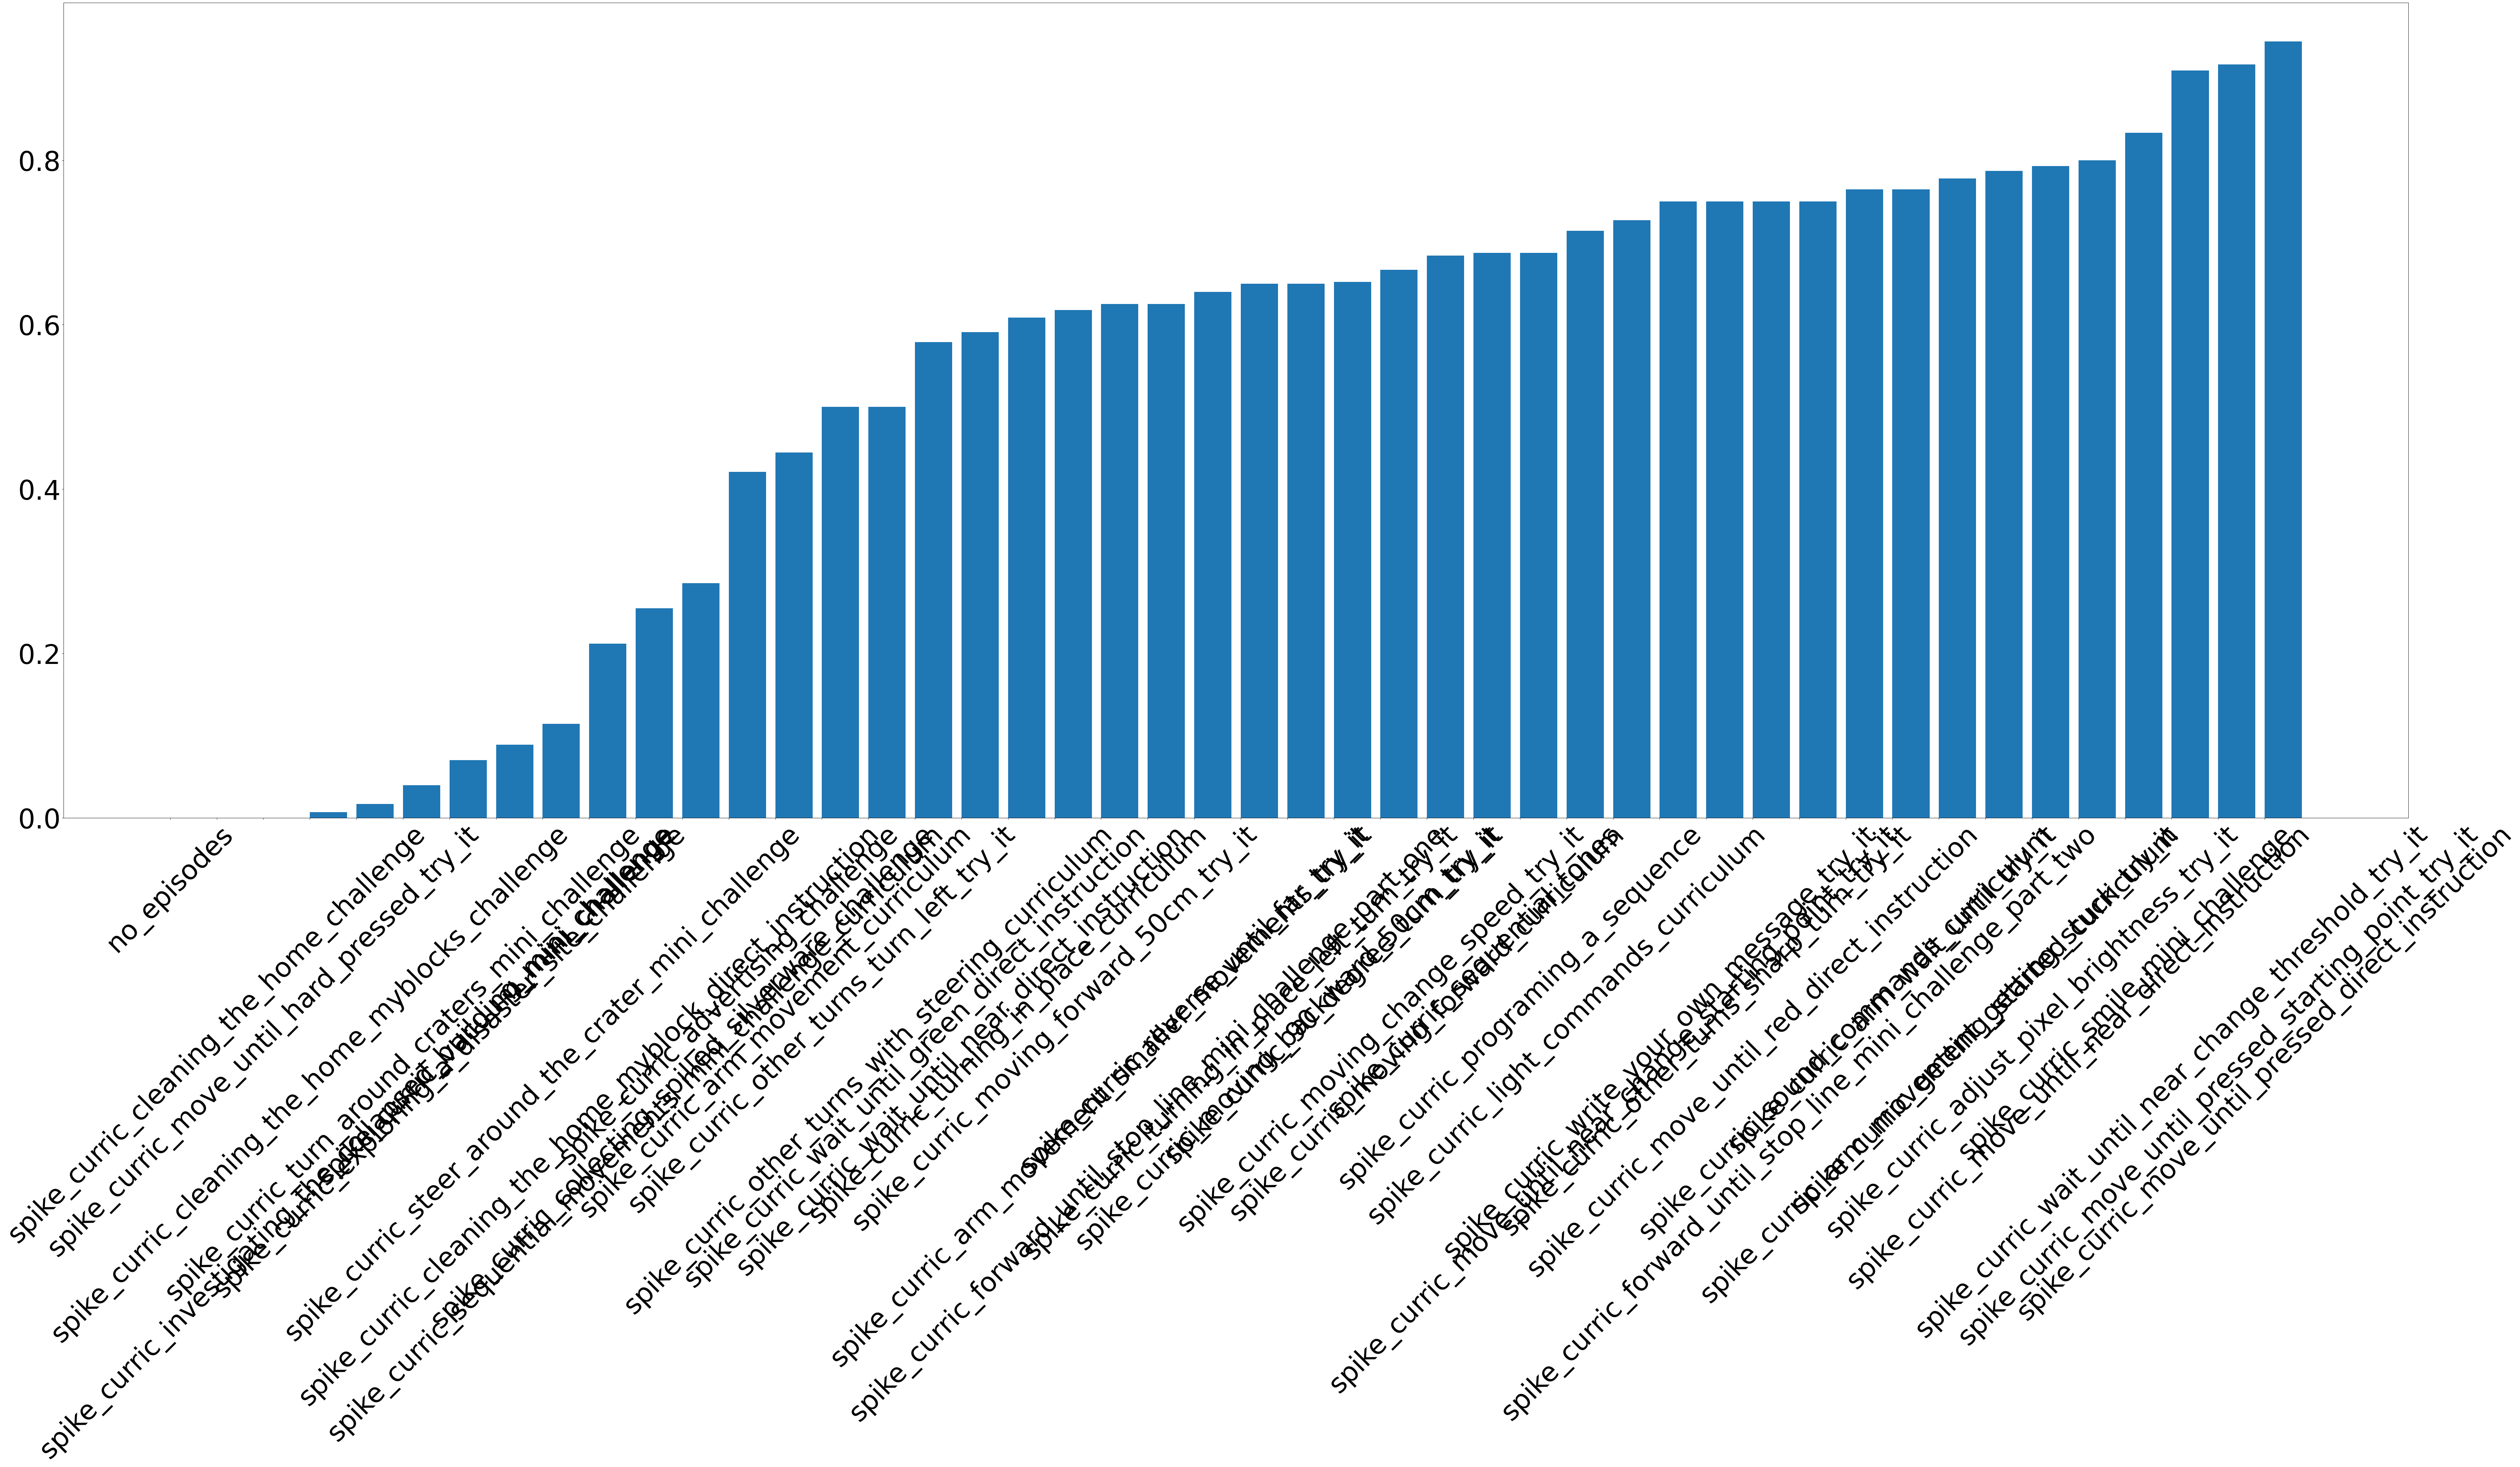

In [39]:
plt.figure(figsize=(100,35))
plt.bar(*zip(*sorted(pass_ratios.items(), key=lambda x: x[1])), align='edge')
plt.xticks(rotation = 45, fontsize=64)
plt.yticks(fontsize=64)

plt.savefig('help.png')

In [40]:
sorted(pass_counts.items(), key=lambda x: x[1])

[('no_episodes', (0, 1)),
 ('spike_curric_cleaning_the_home_challenge', (0, 257)),
 ('spike_curric_move_until_hard_pressed_try_it', (0, 355)),
 ('spike_curric_cleaning_the_home_myblocks_challenge', (1, 141)),
 ('spike_curric_investigating_the_collapsed_building_mini_challenge',
  (3, 179)),
 ('spike_curric_vacuum_mini_challenge', (4, 45)),
 ('spike_curric_light_commands_curriculum', (5, 7)),
 ('spike_curric_exploring_a_disaster_site_challenge', (5, 71)),
 ('spike_curric_cleaning_the_home_myblock_direct_instruction', (7, 33)),
 ('spike_curric_advertising_challenge', (8, 19)),
 ('spike_curric_wait_until_near_change_threshold_try_it', (10, 11)),
 ('spike_curric_smile_mini_challenge', (10, 12)),
 ('spike_curric_turn_around_craters_mini_challenge', (10, 252)),
 ('spike_curric_sequential_tones', (11, 16)),
 ('spike_curric_programing_a_sequence', (11, 16)),
 ('spike_curric_wait_until_green_direct_instruction', (11, 19)),
 ('spike_curric_other_turns_turn_left_try_it', (11, 22)),
 ('spike_curri

# Separating by student

In [41]:
episode_df = pd.DataFrame(columns=["challenge_name", "user_id", "number_starts", "number_passes", 
                                   "number_altered_starts", "number_altered_passes"])

for i, all_frames in iter_enum_session_frames():
    if len(all_frames) > 0:
        episode_start_frames = [(f.object_name, f.state_info) for i, f in all_frames.iterrows() if f.verb == "episode_started"]
        passing_frames = all_frames[all_frames.object_name == "challenge_pass"]
        passing_frames = passing_frames.reset_index()
        user_id = raw_data.user_id[i]
        challenge_name = episode_start_frames[0][0] if len(episode_start_frames)> 0 else "no_episodes"
        
        if len(episode_start_frames) > 1:
            num_altered_starts = 1
            for i in range(1, len(episode_start_frames)):
                if hash(episode_start_frames[i][1]["program"]) != hash(episode_start_frames[i-1][1]["program"]):
                    num_altered_starts+=1
        else:
            num_altered_starts = len(episode_start_frames)
        
        if len(passing_frames) > 1:
            num_altered_passes = 1
            for i in range(1, len(passing_frames)):
                if hash(passing_frames.state_info[i]["program"]) != hash(passing_frames.state_info[i-1]["program"]):
                    num_altered_passes+=1
        else:
            num_altered_passes = len(passing_frames)
                


        episode_df.loc[i] = [challenge_name, user_id, len(episode_start_frames), len(passing_frames), 
                             num_altered_starts, num_altered_passes]
    else:
        episode_df.loc[i] = ["no_episodes", np.nan, 0, 0, 0, 0]

In [42]:
episode_df = episode_df.astype({"user_id":"object", "number_starts":"int64", "number_passes":"int64", "number_starts":"int64", "number_passes":"int64"})

In [43]:
episode_df.groupby("user_id").nunique().challenge_name

user_id
530514.0     2 
1923583.0    2 
1927379.0    13
1927404.0    1 
1947069.0    6 
1947078.0    30
1947080.0    5 
1947081.0    31
1947082.0    26
1947084.0    21
1947087.0    17
1947091.0    21
1947120.0    30
1947124.0    16
1947126.0    21
1979764.0    3 
Name: challenge_name, dtype: int64

In [44]:
episode_df.groupby("user_id").nunique().challenge_name.describe()

count    16.000000
mean     15.312500
std      10.958824
min      1.000000 
25%      4.500000 
50%      16.500000
75%      22.250000
max      31.000000
Name: challenge_name, dtype: float64

In [45]:
episode_df.groupby("user_id").describe()

number_starts                                                   \
                  count      mean        std  min  25%  50%    75%   max   
user_id                                                                    
530514.0   4.0           0.500000  0.577350   0.0  0.0  0.5  1.00   1.0    
1923583.0  3.0           0.333333  0.577350   0.0  0.0  0.0  0.50   1.0    
1927379.0  22.0          6.954545  10.144092  0.0  0.0  1.0  11.75  31.0   
1927404.0  3.0           0.000000  0.000000   0.0  0.0  0.0  0.00   0.0    
1947069.0  16.0          0.437500  0.512348   0.0  0.0  0.0  1.00   1.0    
1947078.0  39.0          3.641026  9.898132   0.0  1.0  1.0  1.00   40.0   
1947080.0  5.0           0.800000  0.447214   0.0  1.0  1.0  1.00   1.0    
1947081.0  34.0          1.911765  3.175356   0.0  1.0  1.0  1.00   16.0   
1947082.0  32.0          1.906250  4.679119   0.0  1.0  1.0  1.00   24.0   
1947084.0  33.0          2.696970  6.578777   0.0  0.0  1.0  1.00   26.0   
1947087.0  29.0          0.655172  0.483725   0.0  0.0  1.0  1.00   1.0    
1947091.0  26.0          3.500000  9.555103   0.0  1.0  1.0  1.00   41.0   
1947120.0  37.0          2.189189  5.076295   0.0  1.0  1.0  1.00   29.0   
1947124.0  19.0          3.684211  7.674291   0.0  1.0  1.0  1.00   28.0   
1947126.0  23.0          5.217391  11.843512  0.0  1.0  1.0  1.00   47.0   
1979764.0  3.0           0.666667  0.577350   0.0  0.5  1.0  1.00   1.0    

          number_passes            ... number_altered_starts        \
                  count      mean  ...                   75%   max   
user_id                            ...                               
530514.0   4.0           0.000000  ...  1.00                  1.0    
1923583.0  3.0           0.333333  ...  0.50                  1.0    
1927379.0  22.0          0.318182  ...  7.75                  23.0   
1927404.0  3.0           0.000000  ...  0.00                  0.0    
1947069.0  16.0          0.312500  ...  1.00                  1.0    
1947078.0  39.0          0.692308  ...  1.00                  21.0   
1947080.0  5.0           0.800000  ...  1.00                  1.0    
1947081.0  34.0          0.794118  ...  1.00                  15.0   
1947082.0  32.0          0.687500  ...  1.00                  13.0   
1947084.0  33.0          0.575758  ...  1.00                  21.0   
1947087.0  29.0          0.586207  ...  1.00                  1.0    
1947091.0  26.0          0.730769  ...  1.00                  30.0   
1947120.0  37.0          0.756757  ...  1.00                  19.0   
1947124.0  19.0          0.684211  ...  1.00                  20.0   
1947126.0  23.0          2.434783  ...  1.00                  27.0   
1979764.0  3.0           0.666667  ...  1.00                  1.0    

          number_altered_passes                                                 
                          count      mean       std  min   25%  50%  75%   max  
user_id                                                                         
530514.0   4.0                   0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   
1923583.0  3.0                   0.333333  0.577350  0.0  0.00  0.0  0.5  1.0   
1927379.0  22.0                  0.318182  0.476731  0.0  0.00  0.0  1.0  1.0   
1927404.0  3.0                   0.000000  0.000000  0.0  0.00  0.0  0.0  0.0   
1947069.0  16.0                  0.312500  0.478714  0.0  0.00  0.0  1.0  1.0   
1947078.0  39.0                  0.692308  0.467572  0.0  0.00  1.0  1.0  1.0   
1947080.0  5.0                   0.800000  0.447214  0.0  1.00  1.0  1.0  1.0   
1947081.0  34.0                  0.794118  0.410426  0.0  1.00  1.0  1.0  1.0   
1947082.0  32.0                  0.687500  0.470929  0.0  0.00  1.0  1.0  1.0   
1947084.0  33.0                  0.575758  0.501890  0.0  0.00  1.0  1.0  1.0   
1947087.0  29.0                  0.586207  0.501230  0.0  0.00  1.0  1.0  1.0   
1947091.0  26.0                  0.730769  0.452344  0.0  0.25  1.0  1.0  1.0   
1947120.0  37.0    

In [46]:

episode_df.groupby(["user_id", "challenge_name"]).sum()

number_starts  \
user_id   challenge_name                                                        
530514.0  no_episodes                                           0               
          spike_curric_turn_around_craters_mini_challenge       2               
1923583.0 no_episodes                                           0               
          spike_curric_turning_in_place_curriculum              1               
1927379.0 no_episodes                                           0               
...                                                            ..               
1947126.0 spike_curric_wait_until_near_change_threshold_try_it  1               
          spike_curric_write_your_own_message_try_it            1               
1979764.0 no_episodes                                           0               
          spike_curric_smile_mini_challenge                     1               
          spike_curric_write_your_own_message_try_it            1               

                                                                number_passes  \
user_id   challenge_name                                                        
530514.0  no_episodes                                           0               
          spike_curric_turn_around_craters_mini_challenge       0               
1923583.0 no_episodes                                           0               
          spike_curric_turning_in_place_curriculum              1               
1927379.0 no_episodes                                           0               
...                                                            ..               
1947126.0 spike_curric_wait_until_near_change_threshold_try_it  1               
          spike_curric_write_your_own_message_try_it            1               
1979764.0 no_episodes                                           0               
          spike_curric_smile_mini_challenge                     1               
          spike_curric_write_your_own_message_try_it            1               

                                                                number_altered_starts  \
user_id   challenge_name                                                                
530514.0  no_episodes                                           0                       
          spike_curric_turn_around_craters_mini_challenge       2                       
1923583.0 no_episodes                                           0                       
          spike_curric_turning_in_place_curriculum              1                       
1927379.0 no_episodes                                           0                       
...                                                            ..                       
1947126.0 spike_curric_wait_until_near_change_threshold_try_it  1                       
          spike_curric_write_your_own_message_try_it            1                       
1979764.0 no_episodes                                           0                       
          spike_curric_smile_mini_challenge                     1                       
          spike_curric_write_your_own_message_try_it            1                       

                                                                number_altered_passes  
user_id   challenge_name                                                               
530514.0  no_episodes                                           0                      
          spike_curric_turn_around_craters_mini_challenge       0                      
1923583.0 no_episodes                                           0                      
          spike_curric_turning_in_place_curriculum              1                      
1927379.0 no_episodes                                           0                      
...                                                            ..                      
1947126.0 spike_curric_wait_until_near_change_threshold_try_it  1                      
      

In [47]:
episode_df.groupby(["user_id", "challenge_name"]).sum().describe()


number_starts  number_passes  number_altered_starts  \
count  245.000000     245.000000     245.000000              
mean   3.702041       1.008163       2.820408                
std    9.381978       2.348686       5.991147                
min    0.000000       0.000000       0.000000                
25%    1.000000       1.000000       1.000000                
50%    1.000000       1.000000       1.000000                
75%    1.000000       1.000000       1.000000                
max    81.000000      37.000000      37.000000               

       number_altered_passes  
count  245.000000             
mean   0.959184               
std    1.601219               
min    0.000000               
25%    1.000000               
50%    1.000000               
75%    1.000000               
max    25.000000

In [48]:
episode_df.describe()

number_starts  number_passes  number_altered_starts  \
count  365.000000     365.000000     365.000000              
mean   2.484932       0.676712       1.893151                
std    6.805615       1.969445       4.487110                
min    0.000000       0.000000       0.000000                
25%    0.000000       0.000000       0.000000                
50%    1.000000       1.000000       1.000000                
75%    1.000000       1.000000       1.000000                
max    47.000000      37.000000      30.000000               

       number_altered_passes  
count  365.000000             
mean   0.643836               
std    1.370508               
min    0.000000               
25%    0.000000               
50%    1.000000               
75%    1.000000               
max    25.000000

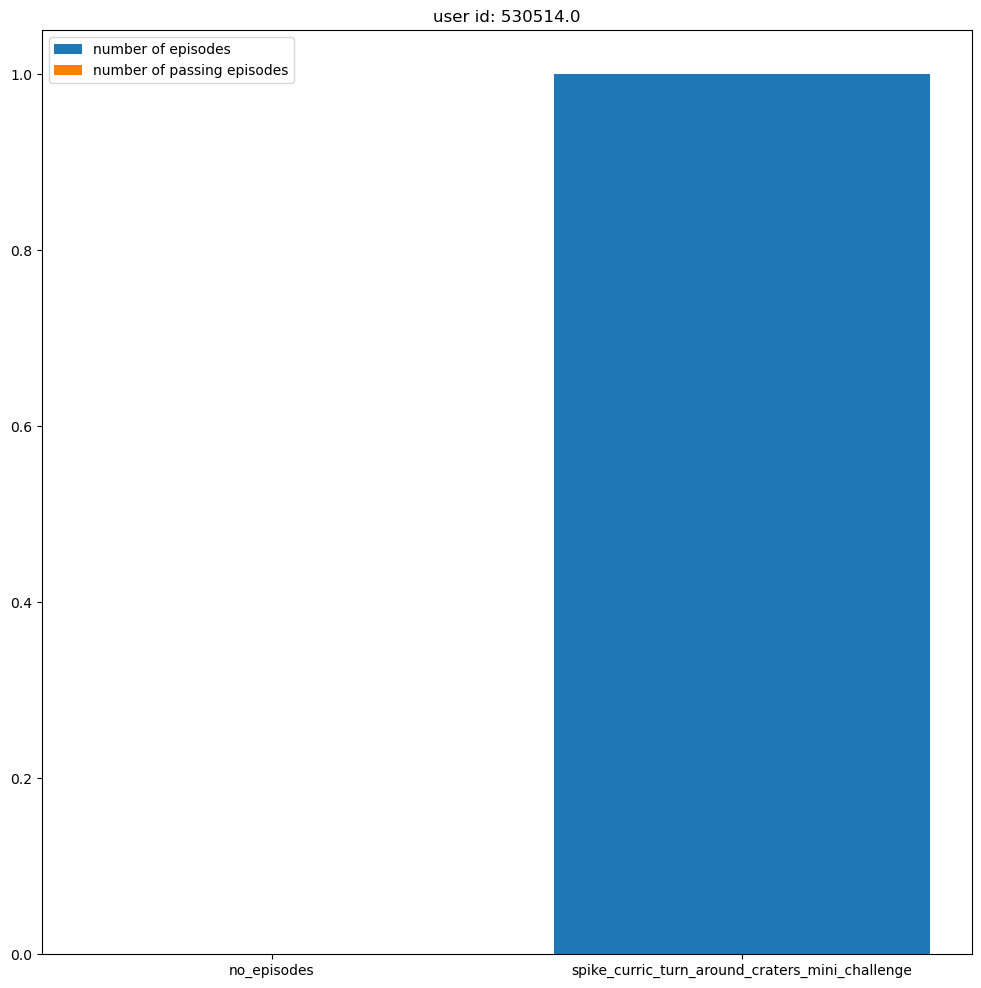

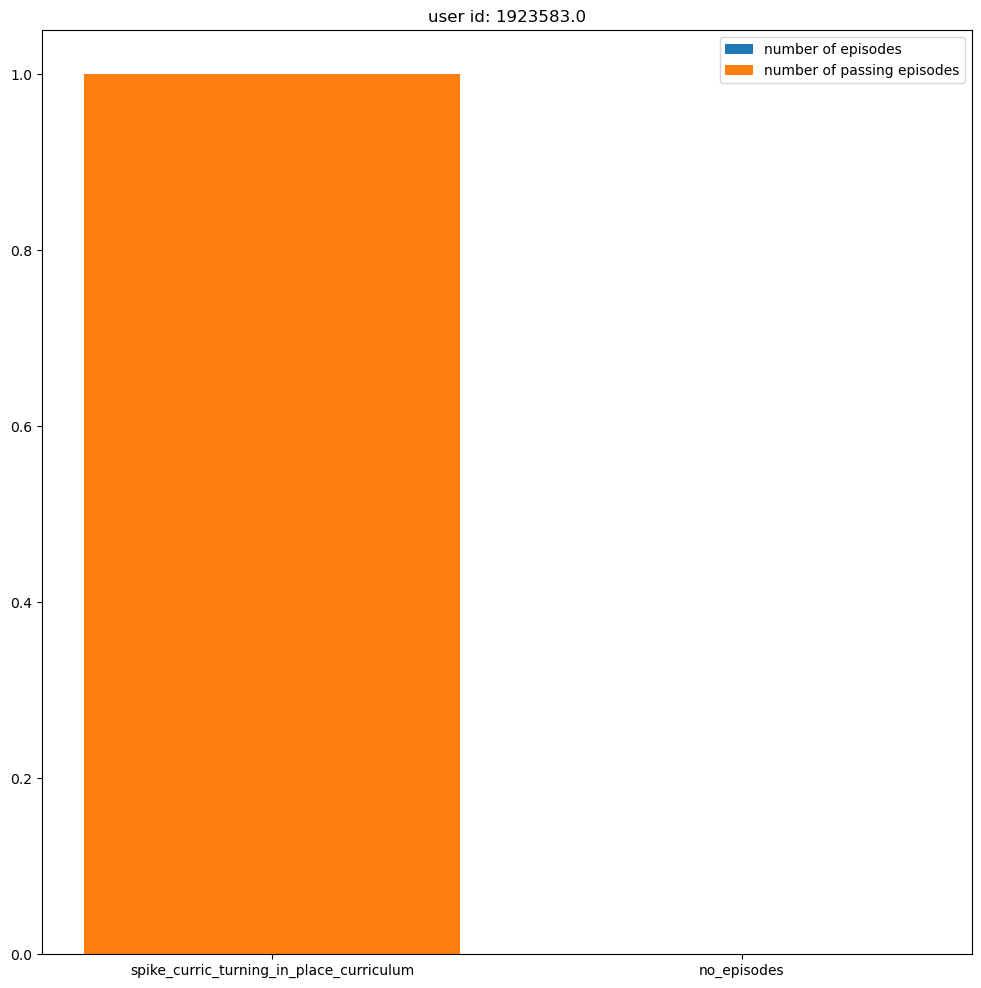

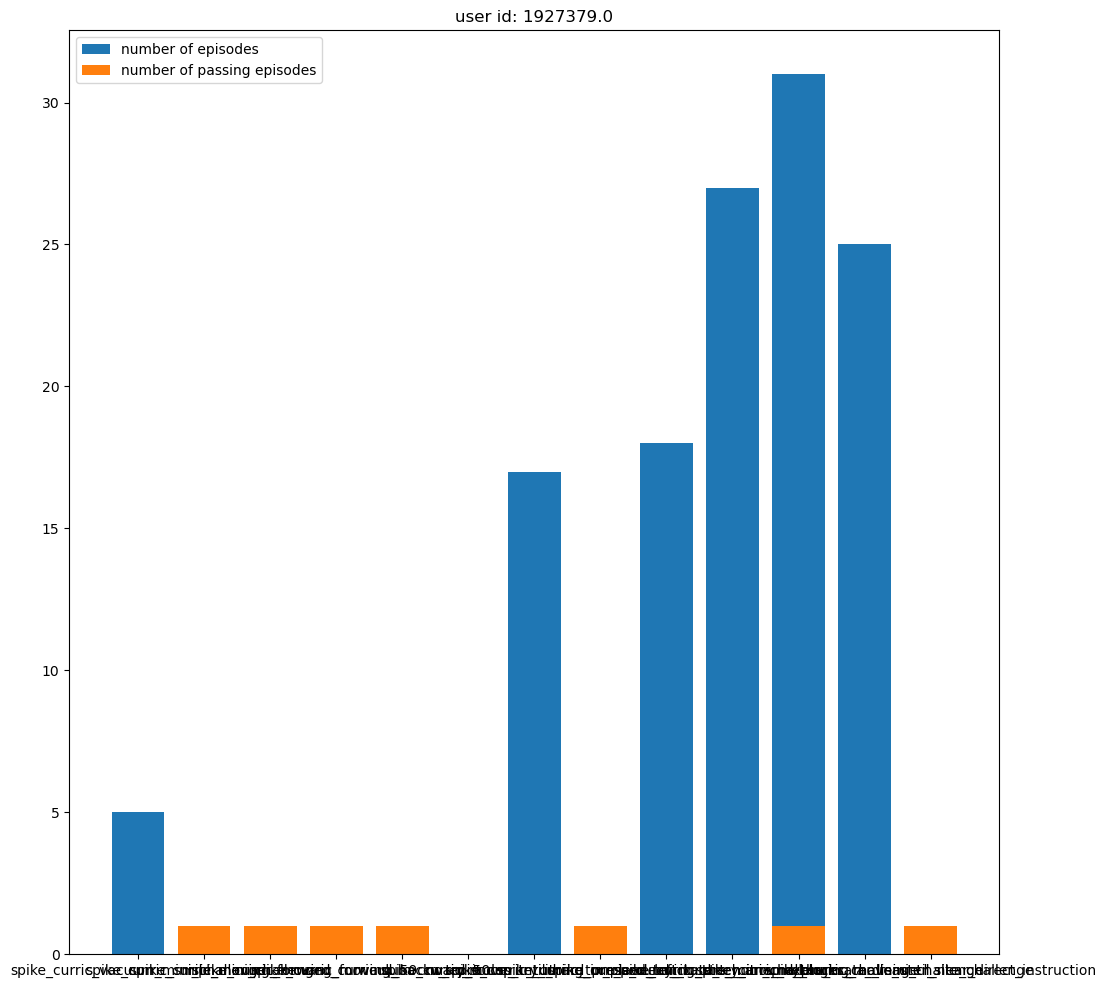

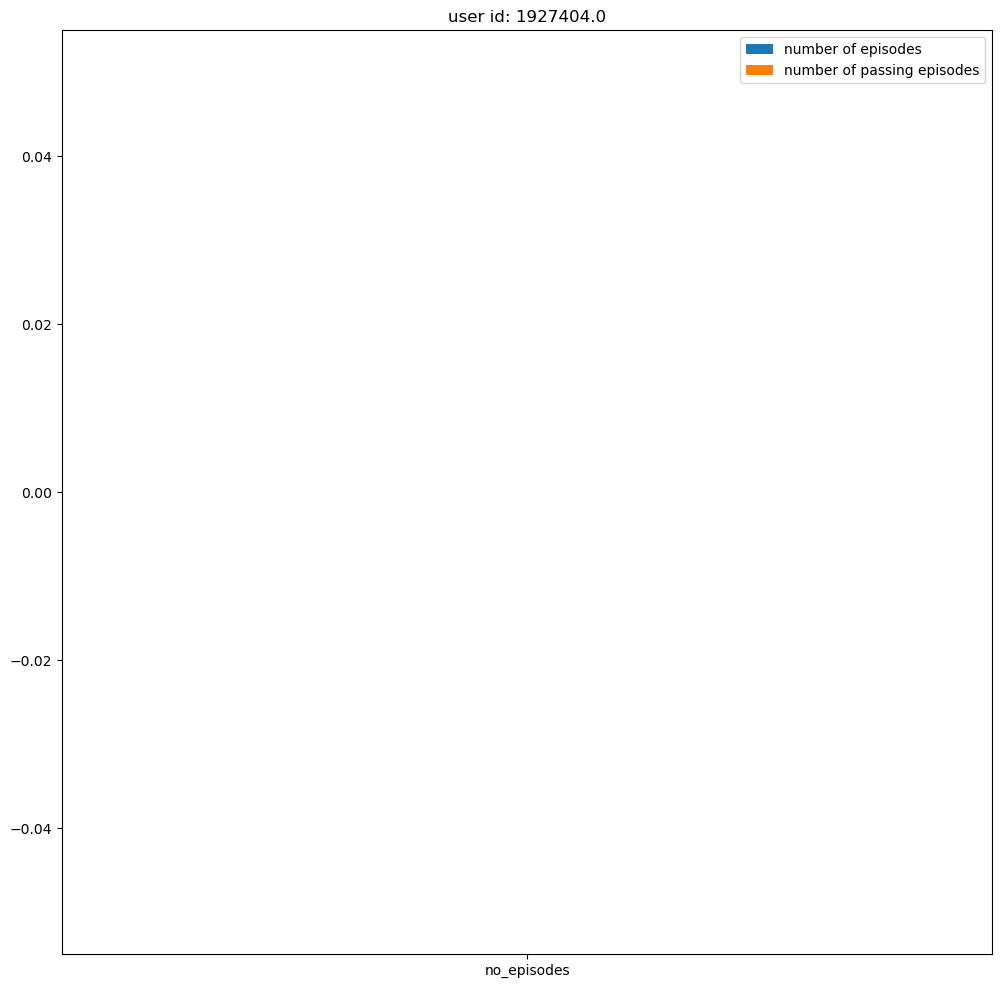

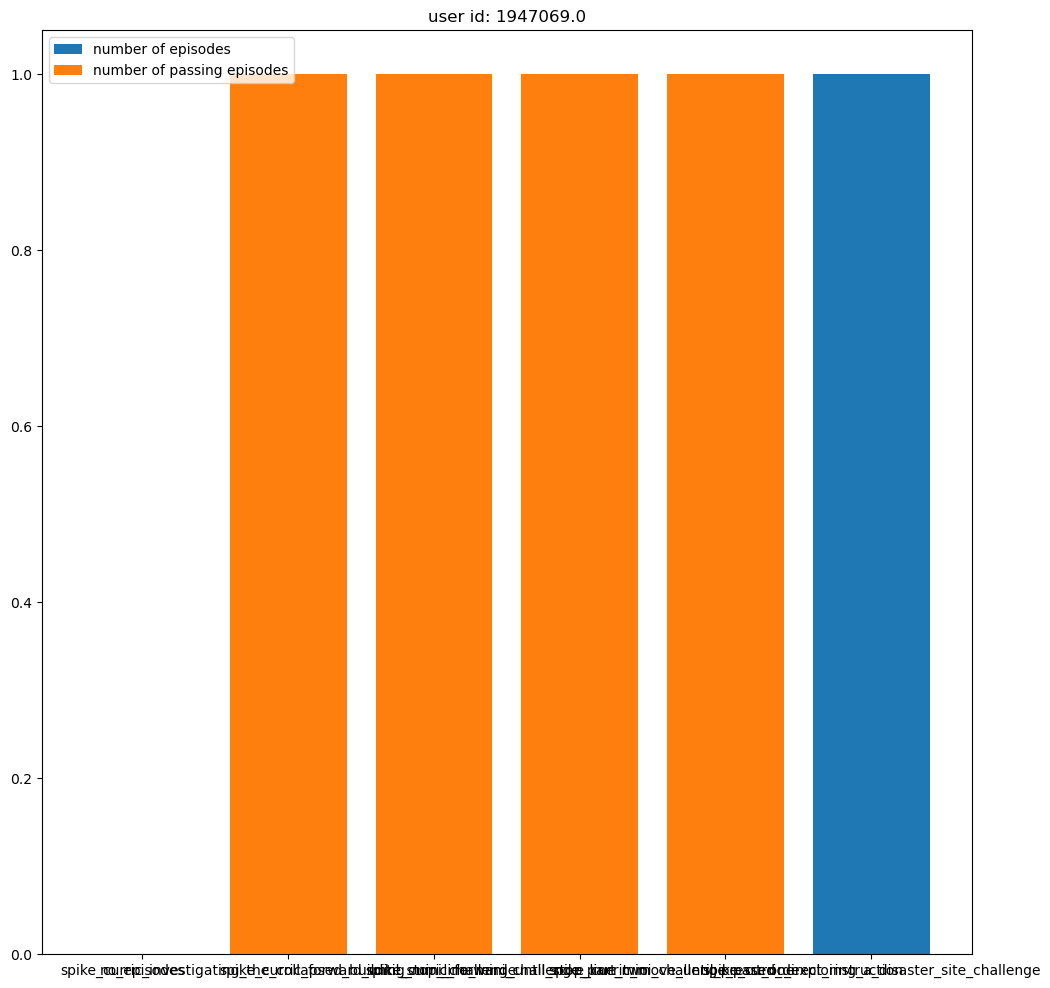

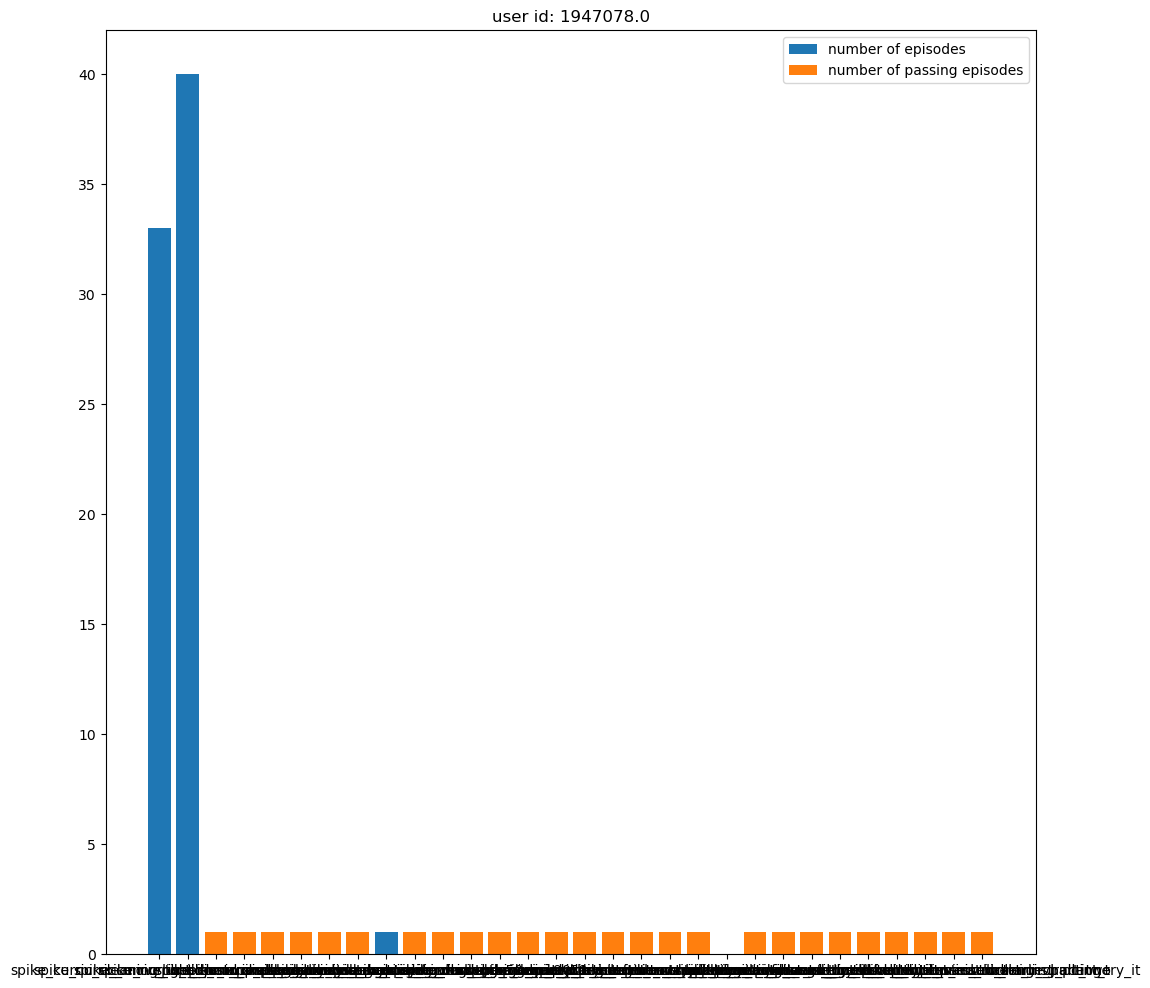

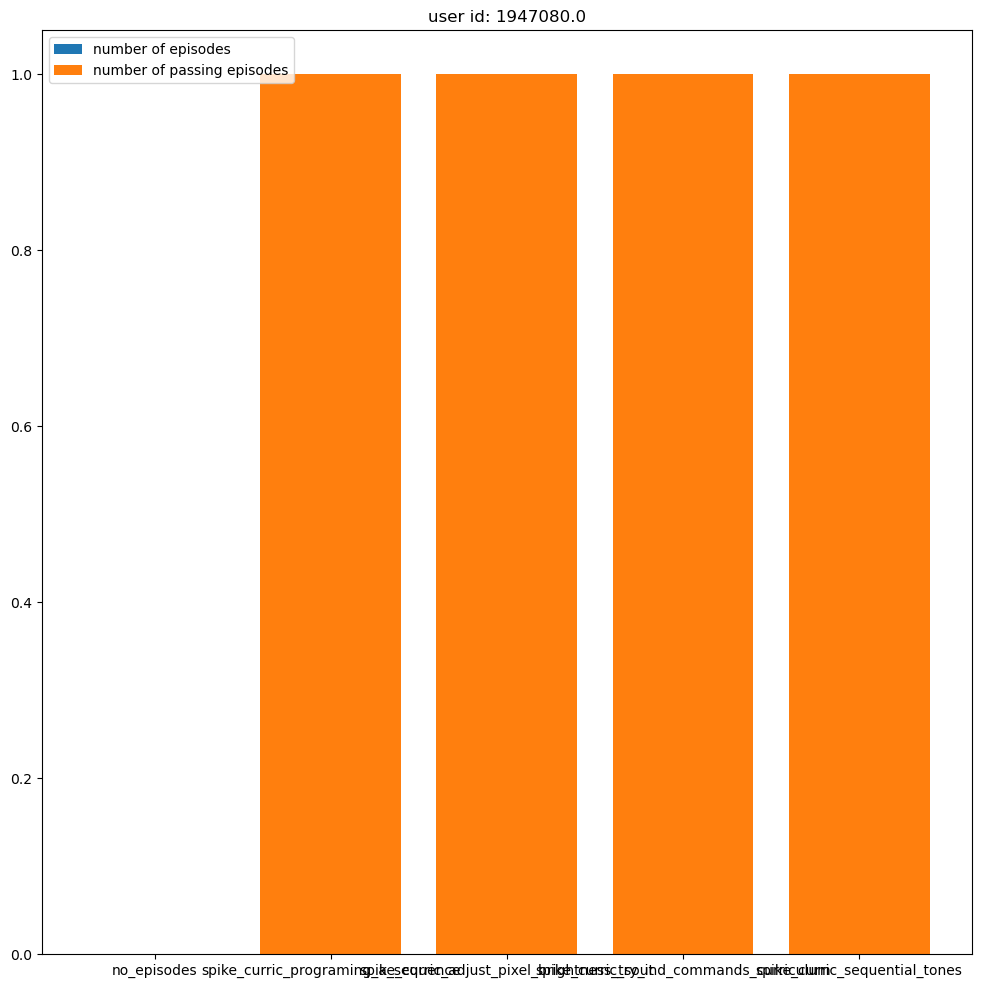

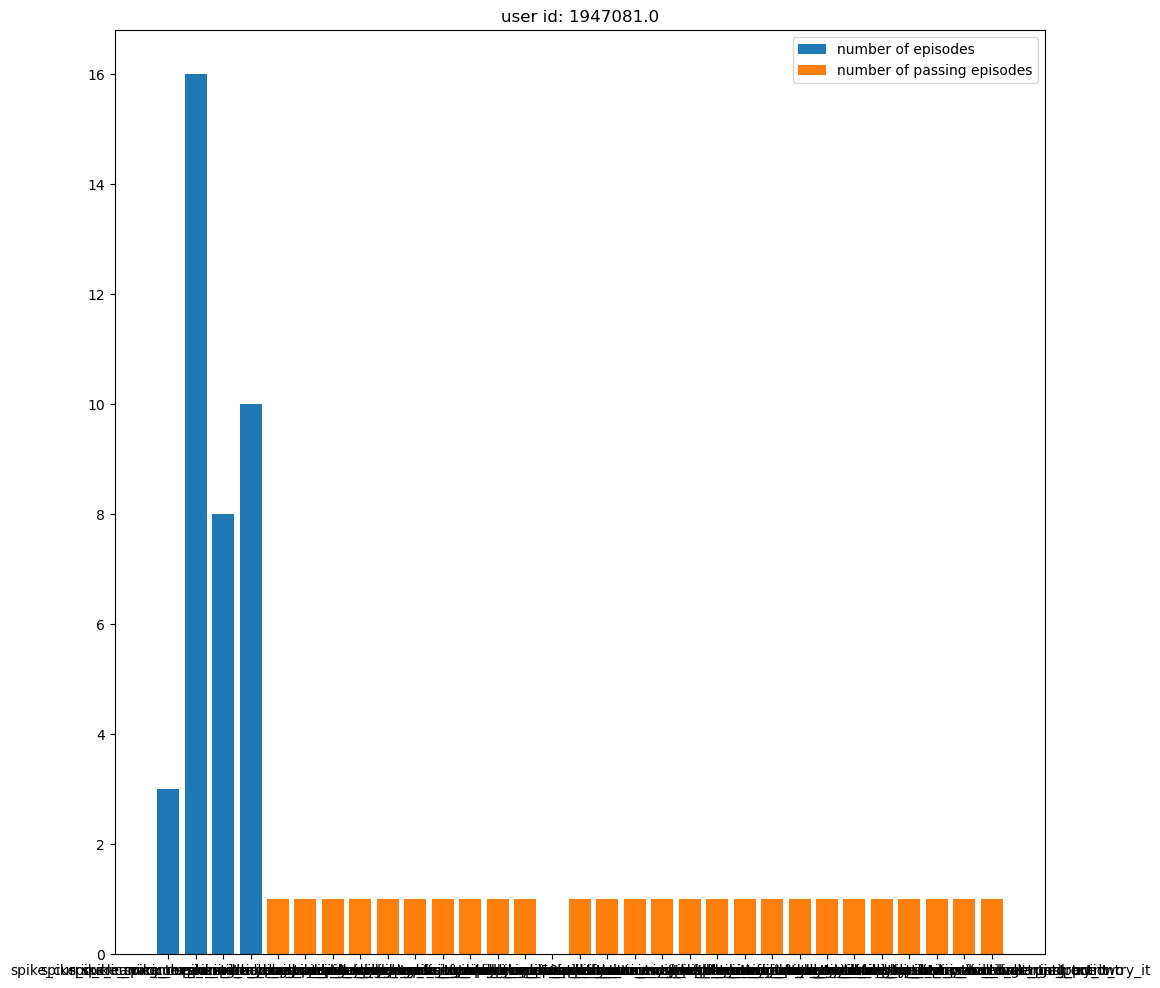

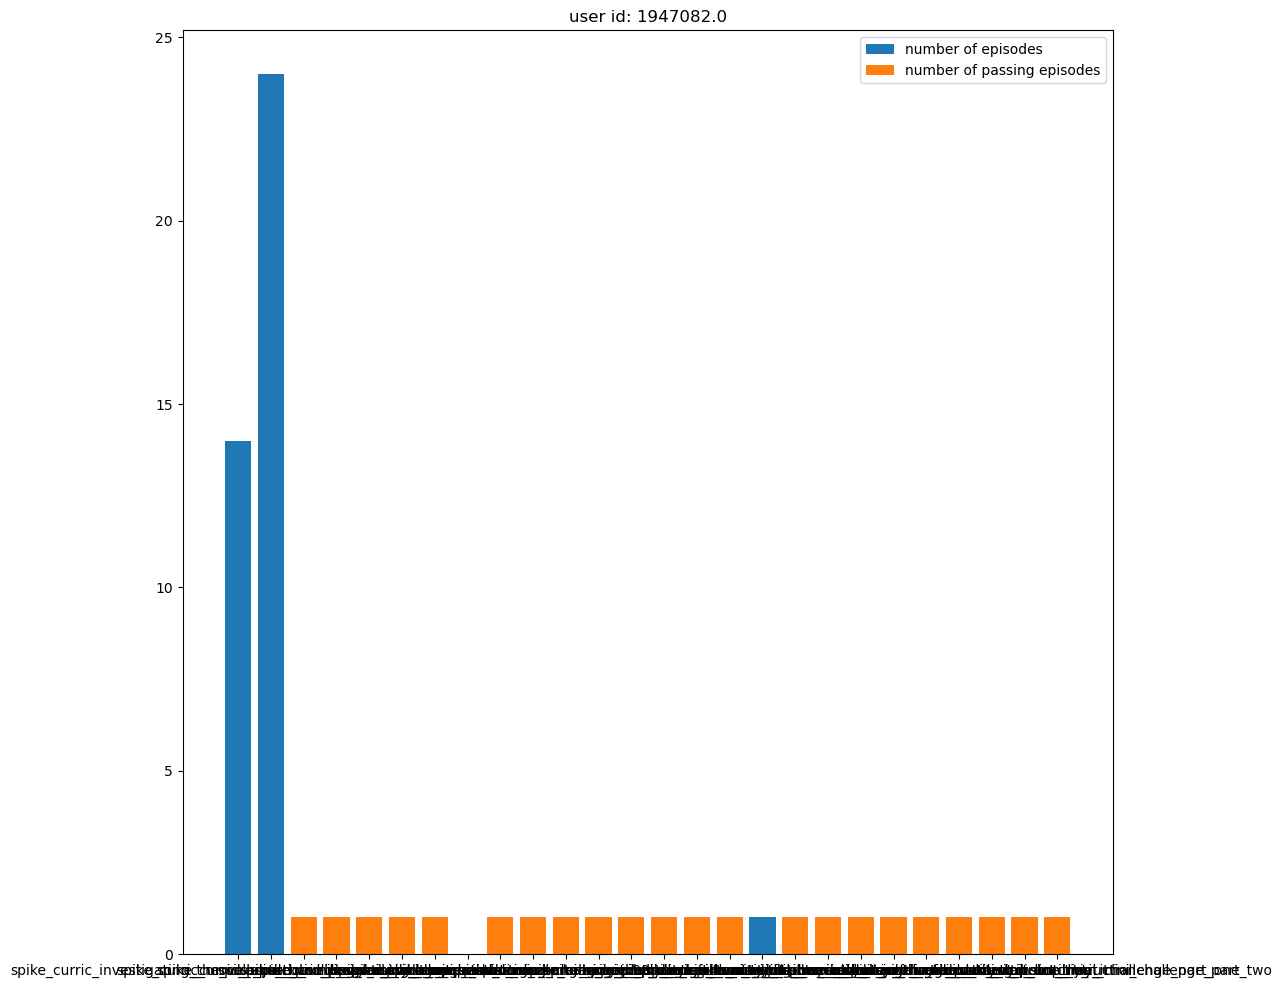

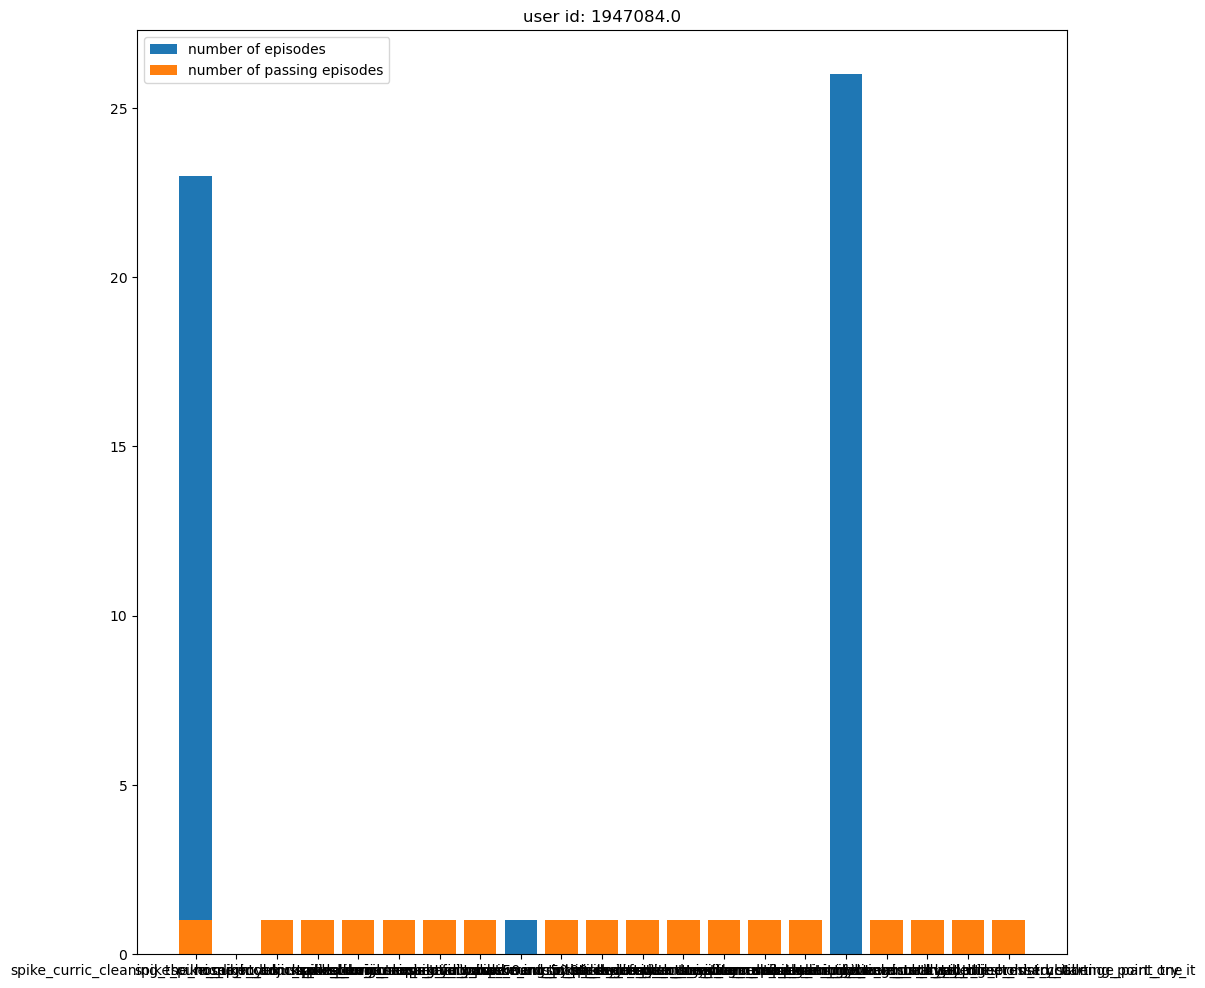

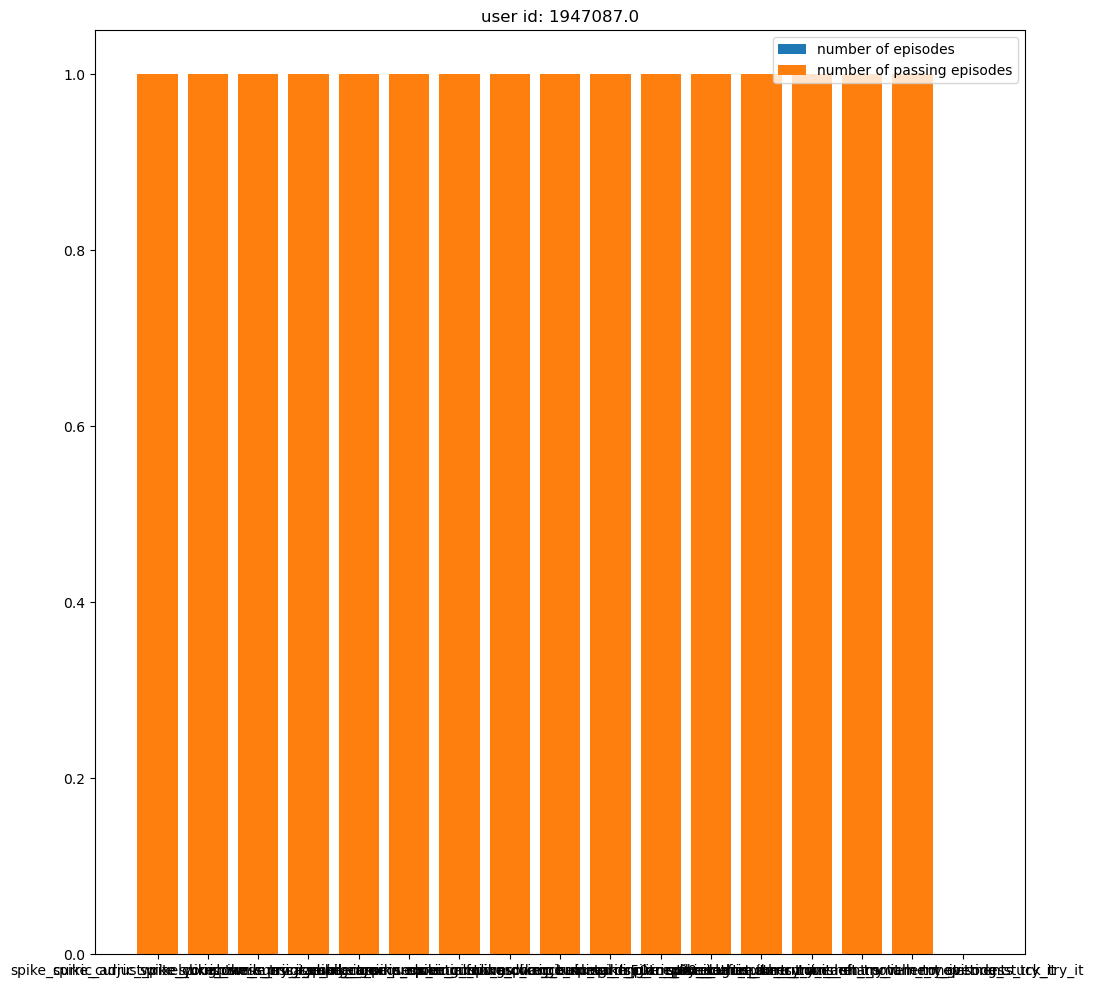

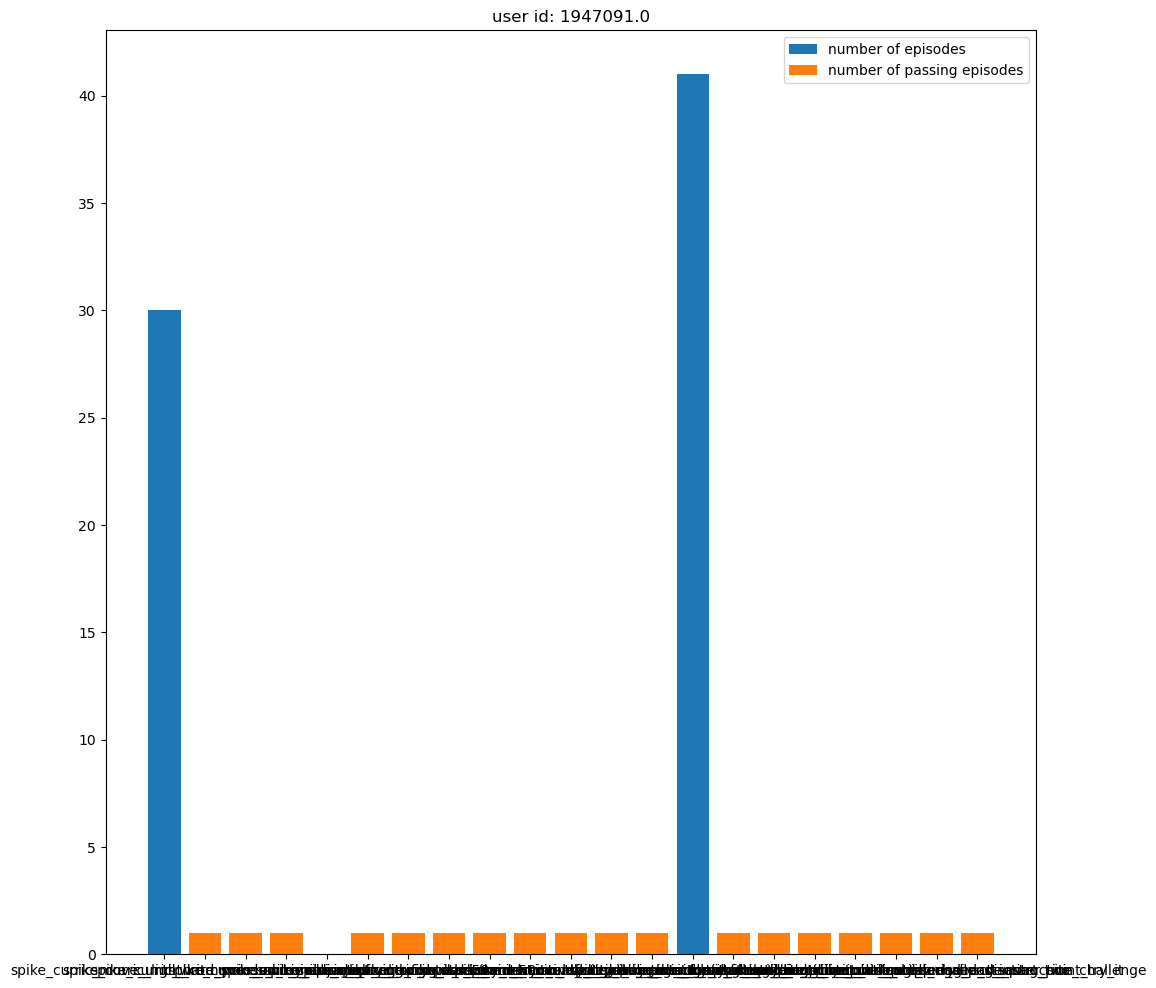

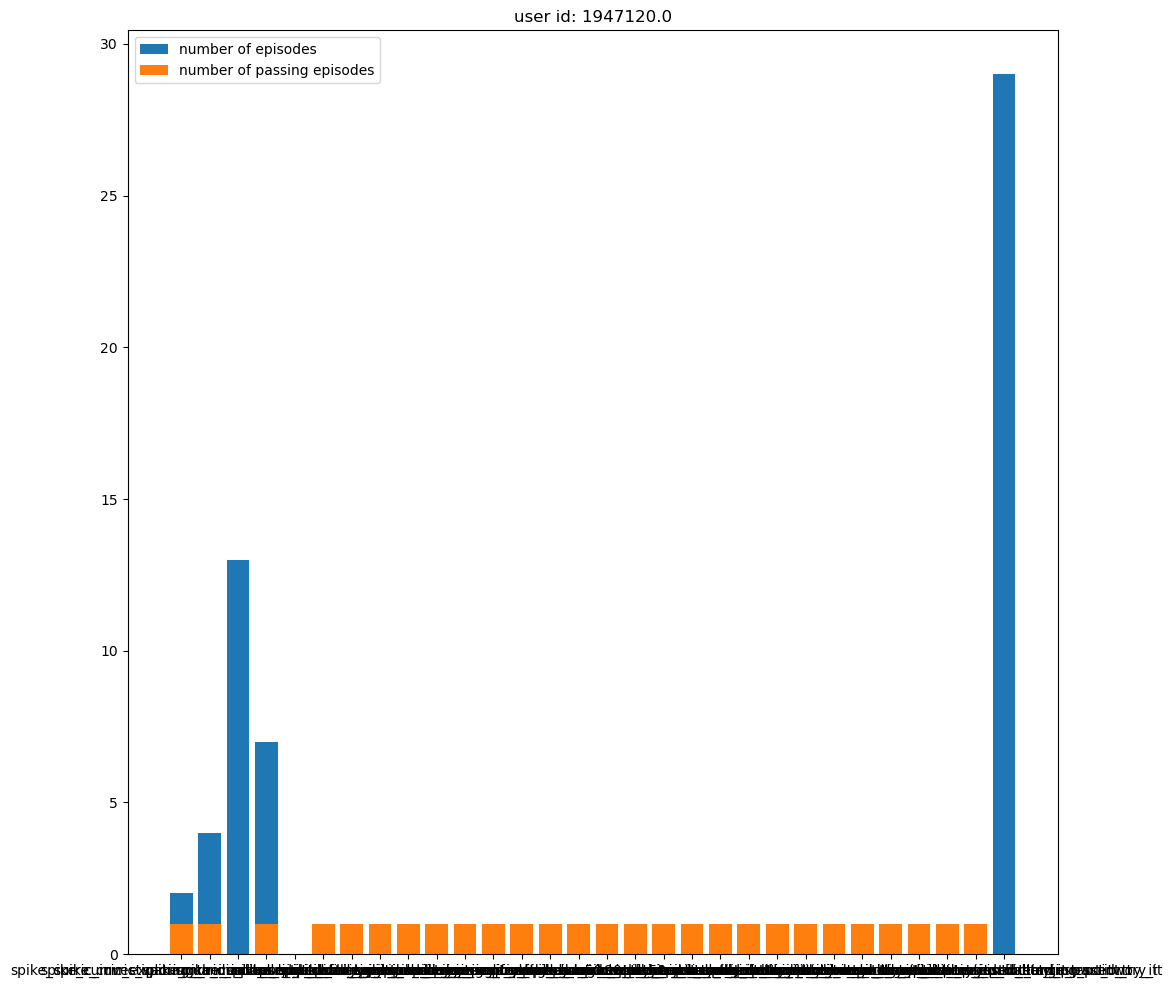

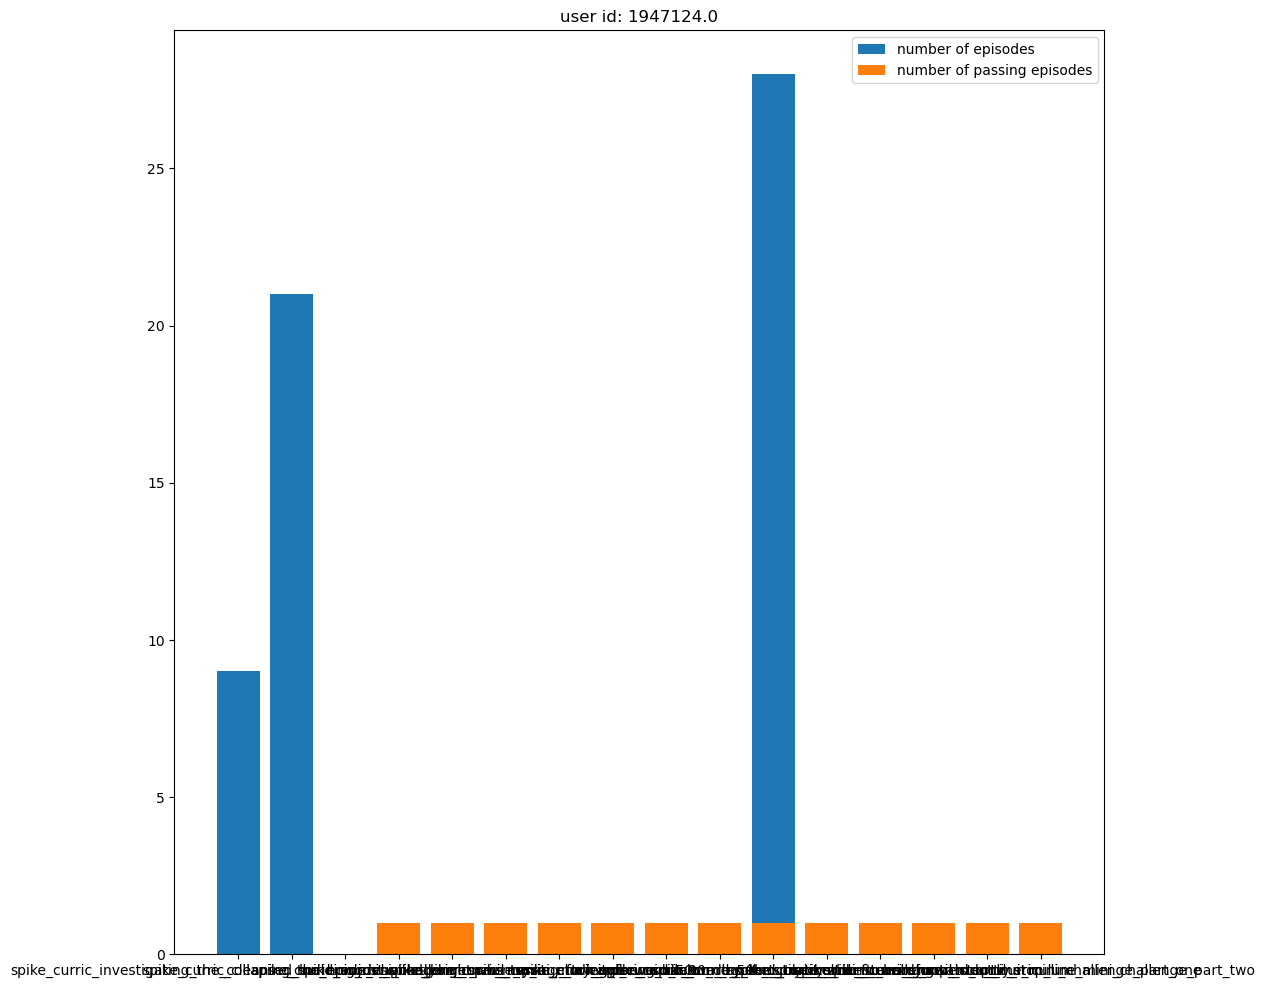

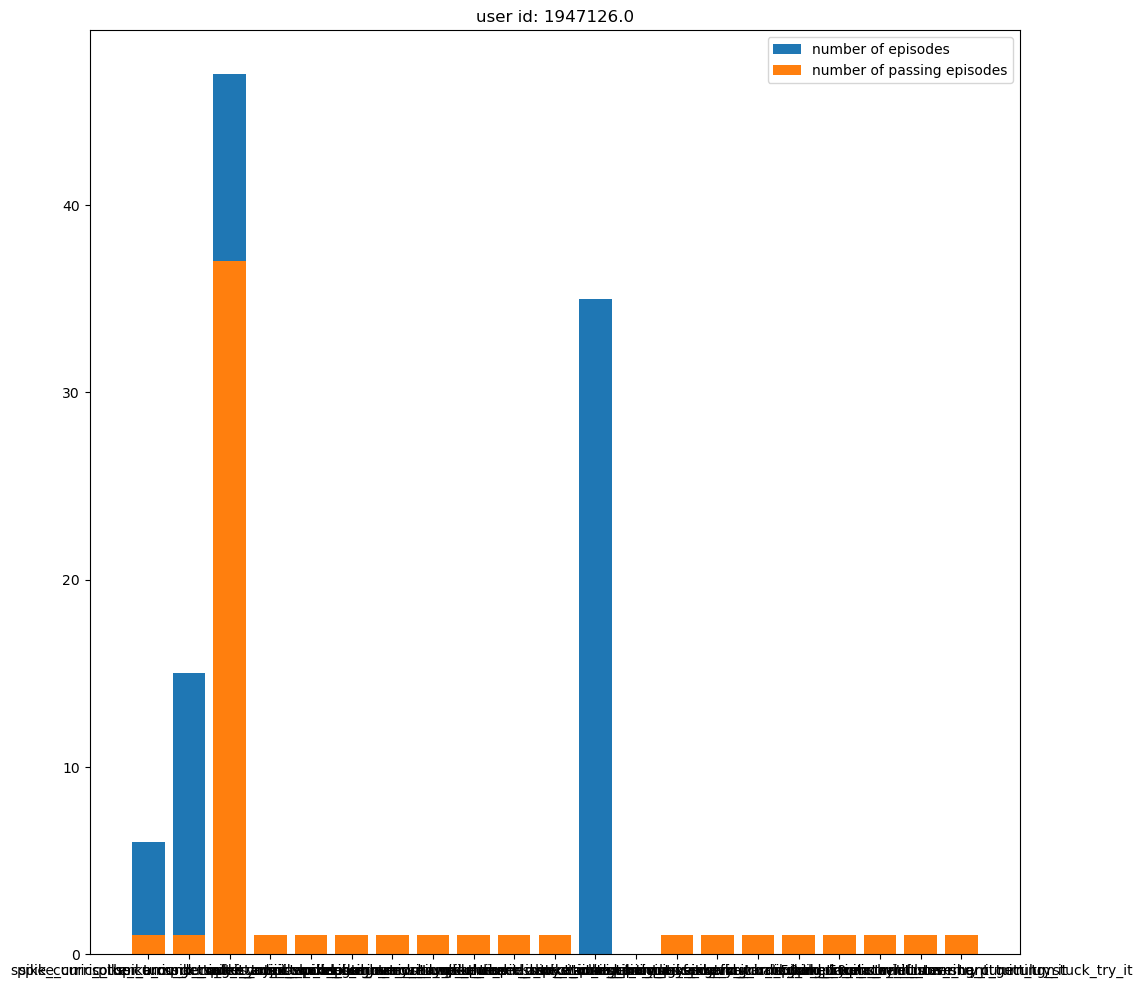

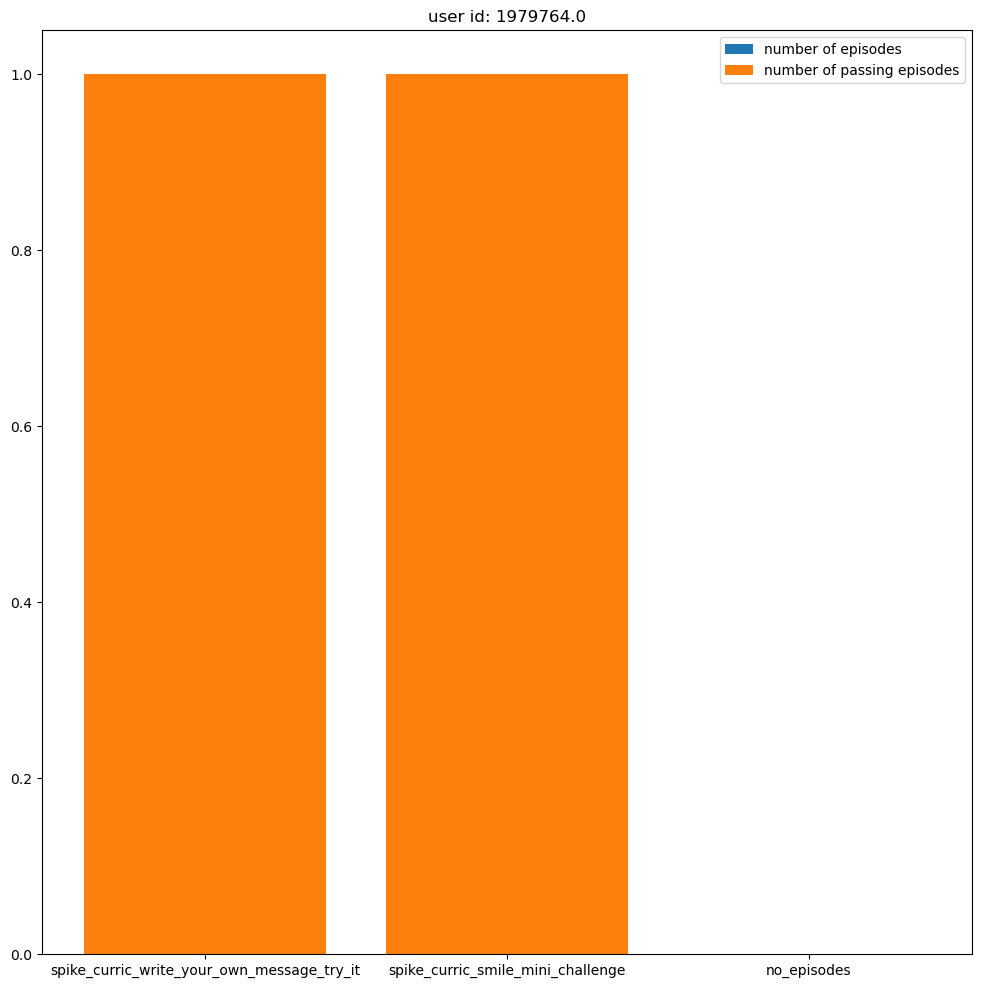

In [49]:
for name, subsetdf in episode_df.groupby("user_id"):
    plt.figure(figsize=(12,12))
    plt.bar(subsetdf.challenge_name, subsetdf.number_starts, label="number of episodes")
    plt.bar(subsetdf.challenge_name, subsetdf.number_passes, label="number of passing episodes")
    plt.title("user id: " + str(name))
    plt.legend()

# Did the program change between episodes?

In [50]:
x={'program': {"targets":[{"isStage":True,"name":"Stage","variables":{"`jEk@4|i[#Fk?(8x)AV.-my variable":["my variable",0]},"lists":{},"broadcasts":{},"blocks":{"io9Jcf3?[Z3`[L)5Zbd":{"opcode":"event_whenprogramstarts","next":None,"parent":None,"inputs":{},"fields":{},"shadow":False,"topLevel":True,"x":69,"y":53},"]:#;If^S,Pl7S87X0Dhp":{"opcode":"spike_movemenet_direction_for_duration","next":None,"parent":None,"inputs":{"DIRECTION":[1,"kW^rlmBz~6}C$XdGkH_z"],"RATE":[1,[4,"10"]]},"fields":{"UNITS":["cm",None]},"shadow":False,"topLevel":True,"x":-358,"y":55},"kW^rlmBz~6}CXdGkH_z":{"opcode":"spike_movement_direction_picker","next":None,"parent":"]:#;If^S,Pl7S87X0Dhp","inputs":{},"fields":{"SPIN_DIRECTIONS":["forward",None]},"shadow":True,"topLevel":False}},"comments":{},"currentCostume":0,"costumes":[{"assetId":"cd21514d0531fdffb22204e0ec5ed84a","name":"backdrop1","md5ext":"cd21514d0531fdffb22204e0ec5ed84a.svg","dataFormat":"svg","rotationCenterX":240,"rotationCenterY":180}],"sounds":[{"assetId":"83a9787d4cb6f3b7632b4ddfebf74367","name":"pop","dataFormat":"wav","format":"","rate":48000,"sampleCount":1123,"md5ext":"83a9787d4cb6f3b7632b4ddfebf74367.wav"}],"volume":100,"tempo":60,"videoTransparency":50,"videoState":"on","textToSpeechLanguage":None}],"monitors":[],"extensions":[],"meta":{"semver":"3.0.0","vm":"0.11.4","agent":"Mozilla/5.0 (X11; CrOS x86_64 14816.99.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}}}
print(json.dumps(x, indent=3))

{
   "program": {
      "targets": [
         {
            "isStage": true,
            "name": "Stage",
            "variables": {
               "`jEk@4|i[#Fk?(8x)AV.-my variable": [
                  "my variable",
                  0
               ]
            },
            "lists": {},
            "broadcasts": {},
            "blocks": {
               "io9Jcf3?[Z3`[L)5Zbd": {
                  "opcode": "event_whenprogramstarts",
                  "next": null,
                  "parent": null,
                  "inputs": {},
                  "fields": {},
                  "shadow": false,
                  "topLevel": true,
                  "x": 69,
                  "y": 53
               },
               "]:#;If^S,Pl7S87X0Dhp": {
                  "opcode": "spike_movemenet_direction_for_duration",
                  "next": null,
                  "parent": null,
                  "inputs": {
                     "DIRECTION": [
                        1,
             

In [51]:
frames = parse_raw_data_frames(0)
json.loads(frames.state_info[0]["program"])

{'targets': [{'isStage': True,
   'name': 'Stage',
   'variables': {'`jEk@4|i[#Fk?(8x)AV.-my variable': ['my variable', 0]},
   'lists': {},
   'broadcasts': {},
   'blocks': {'io9Jcf3?[Z3`[$L)5Zbd': {'opcode': 'event_whenprogramstarts',
     'next': None,
     'parent': None,
     'inputs': {},
     'fields': {},
     'shadow': False,
     'topLevel': True,
     'x': 69,
     'y': 53}},
   'comments': {},
   'currentCostume': 0,
   'costumes': [{'assetId': 'cd21514d0531fdffb22204e0ec5ed84a',
     'name': 'backdrop1',
     'md5ext': 'cd21514d0531fdffb22204e0ec5ed84a.svg',
     'dataFormat': 'svg',
     'rotationCenterX': 240,
     'rotationCenterY': 180}],
   'sounds': [{'assetId': '83a9787d4cb6f3b7632b4ddfebf74367',
     'name': 'pop',
     'dataFormat': 'wav',
     'format': '',
     'rate': 48000,
     'sampleCount': 1123,
     'md5ext': '83a9787d4cb6f3b7632b4ddfebf74367.wav'}],
   'volume': 100,
   'tempo': 60,
   'videoTransparency': 50,
   'videoState': 'on',
   'textToSpeechLang

In [52]:
tabulate_frame_changes = pd.DataFrame(columns=["frames","frame_changes"])

for all_frames in iter_session_frames():
    episode_start_frames = [f for i, f in all_frames.iterrows() if f.verb == "episode_started"]
    if len(episode_start_frames) == 0:
        continue
    prev_state_hash = None
    num_frames = 0
    num_changes = 0
    for frame in episode_start_frames:
        state = json.dumps(json.loads(frame.state_info["program"]), sort_keys=True)
        if prev_state_hash != hash(state):
            num_changes += 1
            prev_state_hash = hash(state)
        num_frames += 1
    tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
        
tabulate_frame_changes
        

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tabulate_frame_changes = tabulate_frame_changes.append({"frames": num_frames, "frame_changes": num_changes}, ignore_index=True)
/tmp/ipykernel_26254/3158223033.py:16: FutureWarning: The frame.append method is deprecated an

frames frame_changes
0    1      1           
1    1      1           
2    1      1           
3    1      1           
4    2      1           
..  ..     ..           
499  11     8           
500  17     15          
501  5      5           
502  25     23          
503  1      1           

[504 rows x 2 columns]

In [53]:
tabulate_frame_changes = tabulate_frame_changes.astype({"frames": "int64", "frame_changes": "int64"})
tabulate_frame_changes["ratio"] = tabulate_frame_changes.frame_changes / tabulate_frame_changes.frames
tabulate_frame_changes.describe()

frames  frame_changes       ratio
count  504.000000  504.000000     504.000000
mean   4.575397    3.325397       0.839902  
std    7.148403    4.908433       0.230626  
min    1.000000    1.000000       0.083333  
25%    1.000000    1.000000       0.666667  
50%    2.000000    1.000000       1.000000  
75%    4.000000    3.000000       1.000000  
max    47.000000   30.000000      1.000000

(array([  6.,   3.,  20.,   4.,  59.,  13.,  37.,  29.,  22., 311.]),
 array([0.08333333, 0.175     , 0.26666667, 0.35833333, 0.45      ,
        0.54166667, 0.63333333, 0.725     , 0.81666667, 0.90833333,
        1.        ]),
 <BarContainer object of 10 artists>)

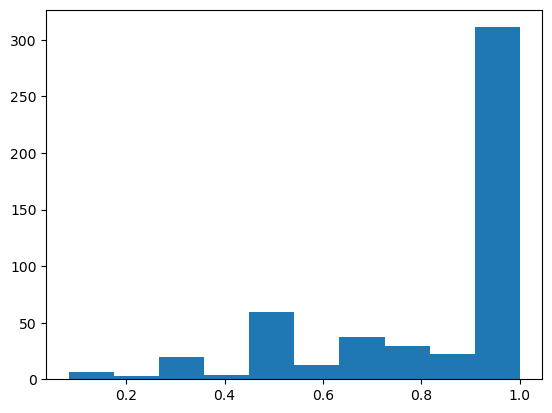

In [54]:
plt.hist(tabulate_frame_changes.ratio)

# Redo of how students navigated sessions